# Trace Clustering in Process Mining

## Importing librarires

In [133]:
import pm4py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [134]:
from pm4py.objects.log.log import EventLog


## Importing log
Importing event log of RoadTraffic. It is in XES format with 51 traces.

In [135]:
# Importing a XES event log
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('DataSets/Repair.xes')
#log[1],type(log)

parsing log, completed traces :: 100%|██████████| 1104/1104 [00:01<00:00, 676.86it/s]


## Petrinet from Heuristic miner on complete log

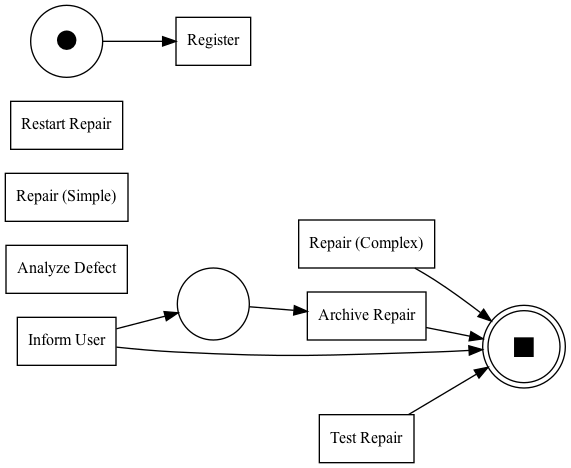

In [195]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, im, fm = alpha_miner.apply(log)
from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

## Log Fitness

In [196]:

from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
fitness = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
simp = simplicity_evaluator.apply(net)
#prec
#fitness, type(fitness)
print('Fitness of log is: ', fitness['log_fitness']*100,'%')
print('Precision of log is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 233/233 [00:00<00:00, 971.96it/s]

Fitness of log is:  68.28336942892967 %
Precision of log is:  23.940950770631463 %
Simplicity of Petrinet is:  100.0 %


### Extracting total Resources

In [138]:
from pm4py.algo.filtering.log.attributes import attributes_filter
#activities = attributes_filter.get_attribute_values(log, "concept:name")
resources = attributes_filter.get_attribute_values(log, "org:resource")
#activities,
resources

{'System': 3612,
 'Tester3': 910,
 'SolverC1': 534,
 'Tester2': 904,
 'SolverS1': 592,
 'Tester6': 876,
 'SolverS2': 498,
 'Tester4': 788,
 'Tester1': 902,
 'SolverS3': 480,
 'SolverC3': 401,
 'Tester5': 844,
 'SolverC2': 514}

### Converting activity keys in to a list

In [139]:
resources_array = resources.keys()
resources_array = list(resources_array)
resources_array


['System',
 'Tester3',
 'SolverC1',
 'Tester2',
 'SolverS1',
 'Tester6',
 'SolverS2',
 'Tester4',
 'Tester1',
 'SolverS3',
 'SolverC3',
 'Tester5',
 'SolverC2']

### Getting activities of each Trace in a Dataframe

In [140]:
## Converting log in to a pandas dataframe
data = pd.read_csv('Datasets/Repair.csv')
#dataframe.to_csv('log.csv')
#dataframe
## Trace profiling on Activities
#data
dataframe =data[['Case ID','Resource']]
dataframe.head(10)

,Case ID,Resource
0,1,System
1,1,Tester3
2,1,SolverC1
3,1,Tester3
4,1,System
5,1,System
6,10,System
7,10,Tester2
8,10,SolverS1
9,10,Tester6


### Making np_array from Dataframe and grouping them on the basis of case identifier

In [141]:
np_arr = np.array(dataframe)
#np_arr
n = np.unique(np_arr[:,0])
events = np.array( [(np_arr[np_arr[:,0]==i,1]) for i in n] )
events

array([array(['System', 'Tester3', 'SolverC1', 'Tester3', 'System', 'System'],
             dtype=object)                                                    ,
       array(['System', 'Tester6', 'System', 'SolverC3', 'Tester4', 'System'],
             dtype=object)                                                    ,
       array(['System', 'Tester3', 'SolverS3', 'System', 'Tester2', 'System'],
             dtype=object)                                                    ,
       ...,
       array(['System', 'Tester2', 'SolverC1', 'Tester6', 'System', 'System',
              'SolverC3', 'Tester3'], dtype=object)                          ,
       array(['System', 'Tester1', 'System', 'SolverS1', 'Tester6', 'System',
              'SolverS3', 'Tester6'], dtype=object)                          ,
       array(['System', 'Tester3', 'SolverS1', 'Tester1', 'System', 'SolverS1',
              'Tester3', 'System', 'System', 'SolverS1', 'Tester4'], dtype=object)],
      dtype=object)

## 2d Vector of Number of CASES X Number of Activities

In [142]:
length  = len(log)
width = len(resources)
length,width
vectors  = [ [0] * width for _ in range(length)]
type(vectors),len(vectors)
vectors

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Activities Profiling - Updating Vector with the count of occurence of Activities

In [143]:
for i in range(len(events)):
        for j in range(len(events[i])):
                if events[i][j] == resources_array[0]:
                    vectors[i][0] += 1
                elif events[i][j] == resources_array[1]:
                    vectors[i][1] += 1
                elif events[i][j] == resources_array[2]:
                    vectors[i][2] += 1
                elif events[i][j] == resources_array[3]:
                    vectors[i][3] += 1
                elif events[i][j] == resources_array[4]:
                    vectors[i][4] += 1
                elif events[i][j] == resources_array[5]:
                    vectors[i][5] += 1
                elif events[i][j] == resources_array[6]:
                    vectors[i][6] += 1
                elif events[i][j] == resources_array[7]:
                    vectors[i][7] += 1
                

### Making ND-Array of the Activity Vector

In [144]:
np_vectors = np.array(vectors)
np_vectors

array([[3, 2, 1, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [3, 1, 0, ..., 0, 0, 0],
       ...,
       [3, 1, 1, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [4, 2, 0, ..., 0, 0, 0]])

## Elbow Method to find optimal number of clusters

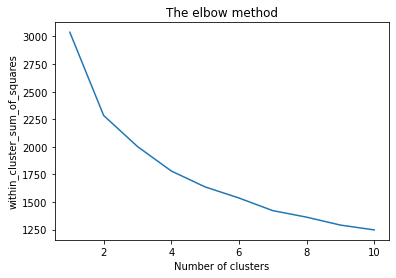

In [145]:
#  Elbow Method 
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(np_vectors)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()

# KMeans - Euclidean

In [146]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(np_vectors)
kmeans.labels_
clustered  = kmeans.predict(np_vectors)
clustered


array([1, 1, 0, ..., 0, 1, 2], dtype=int32)

## Array of Sizes of clustered Data

In [147]:
count_arr = np.bincount(clustered)
print(count_arr)


[311 594 199]


## Creating Sub Event Logs based on Clustering Output

In [148]:
length1  = count_arr[0]
length2 = count_arr[1]
length3 = count_arr[2]

sub_log1 = EventLog()
sub_log2 = EventLog()
sub_log3 = EventLog()

for i in range(len(clustered)):
    if clustered[i] == 0:
        sub_log1.append(log[i])
    
    elif clustered[i] == 1:
        sub_log2.append(log[i])
        
    elif clustered[i] == 2: 
        sub_log3.append(log[i])

# Petrinets from Alpha miner on Sub Event Logs

## Petrinets from Heuristic miner on Sub Event Log1

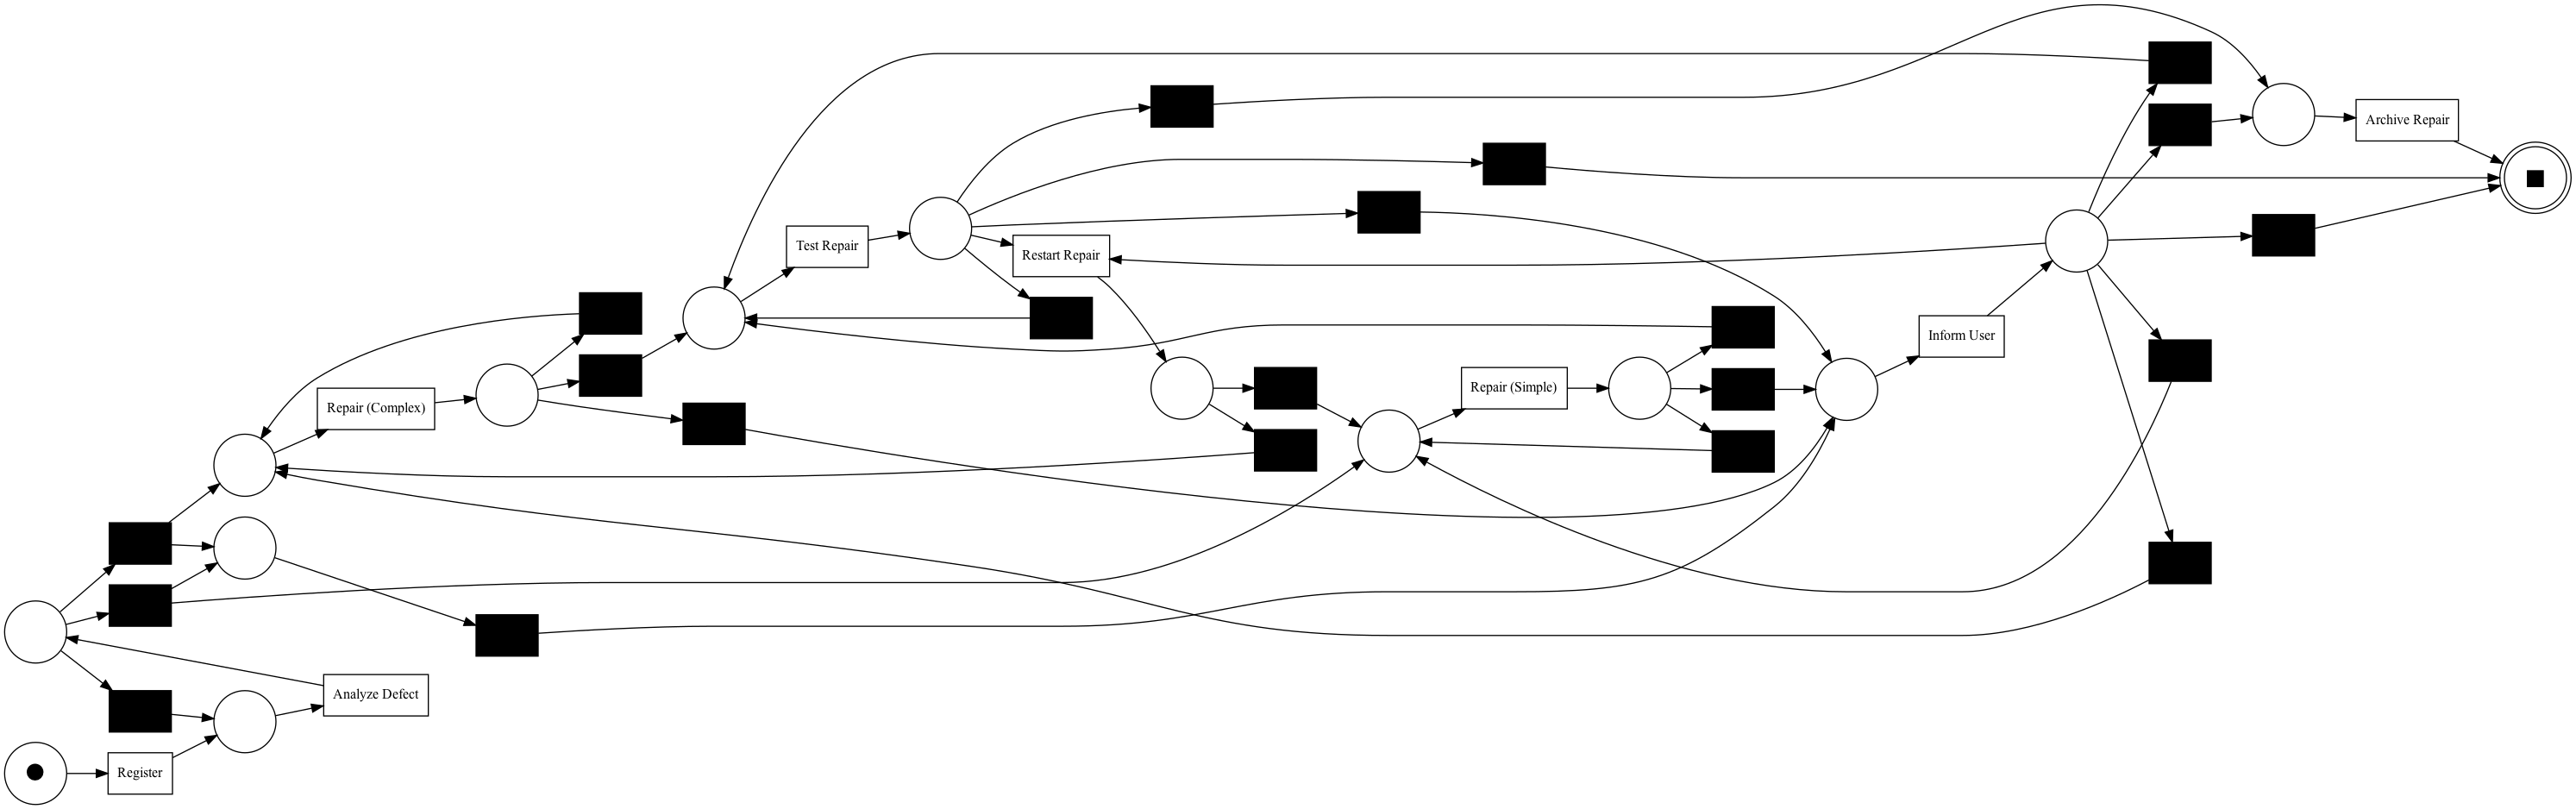

In [149]:

from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net, im, fm = heuristics_miner.apply(sub_log1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})

from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [150]:

fitness = replay_fitness_evaluator.apply(sub_log1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 186/186 [00:00<00:00, 455.08it/s]

Fitness of Petrinet is:  96.7061513497566 %
Precision of Petrinet is:  47.396528704939925 %
Simplicity of Petrinet is:  56.4102564102564 %


## Petrinets from Alpha miner on Sub Event Log2

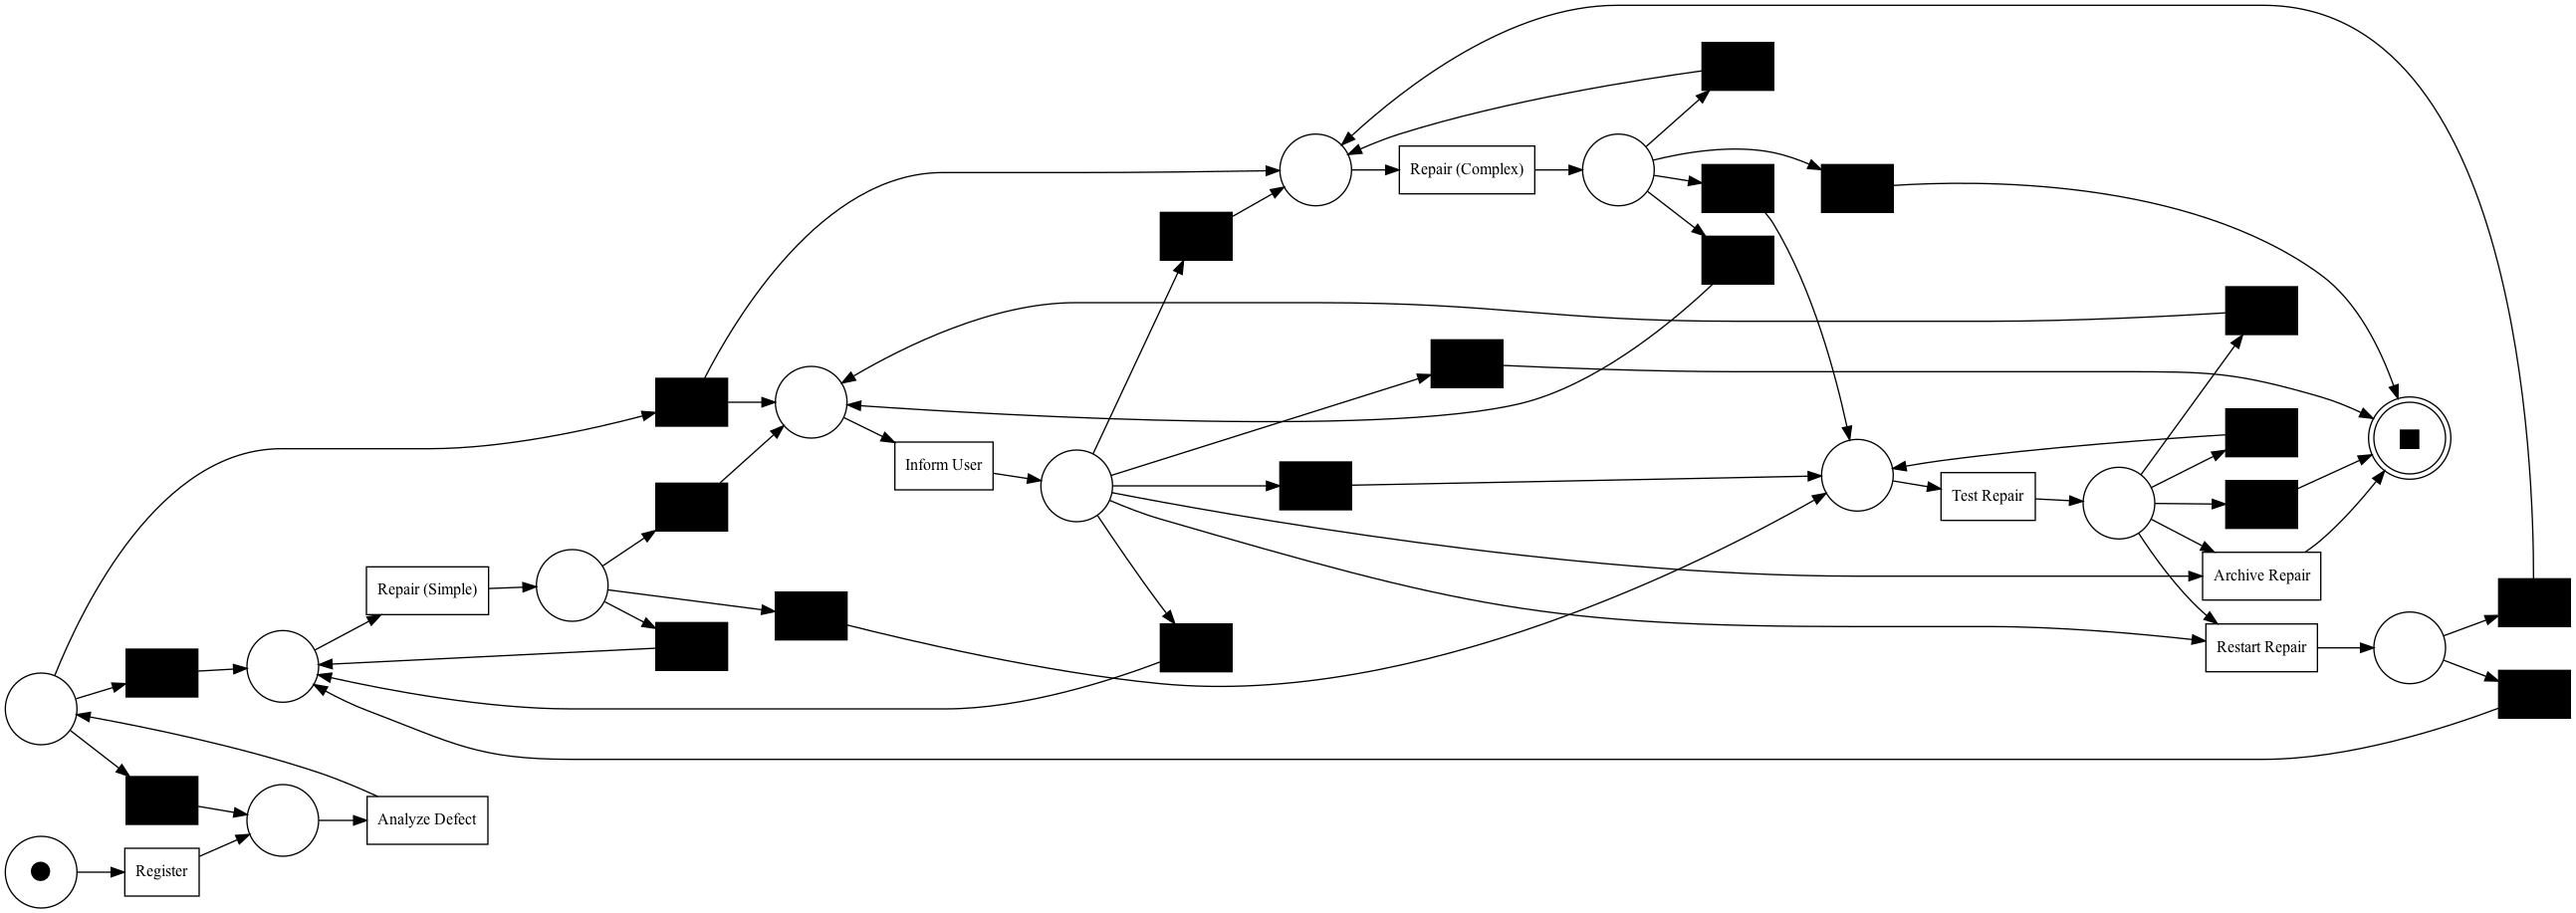

In [151]:

## Import the petrinet visualizer object
net, im, fm = heuristics_miner.apply(sub_log2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [152]:


fitness = replay_fitness_evaluator.apply(sub_log2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 189/189 [00:00<00:00, 660.61it/s]

Fitness of Petrinet is:  95.91860504449703 %
Precision of Petrinet is:  49.83003815469996 %
Simplicity of Petrinet is:  54.05405405405405 %


## Petrinets from Alpha miner on Sub Event Log3

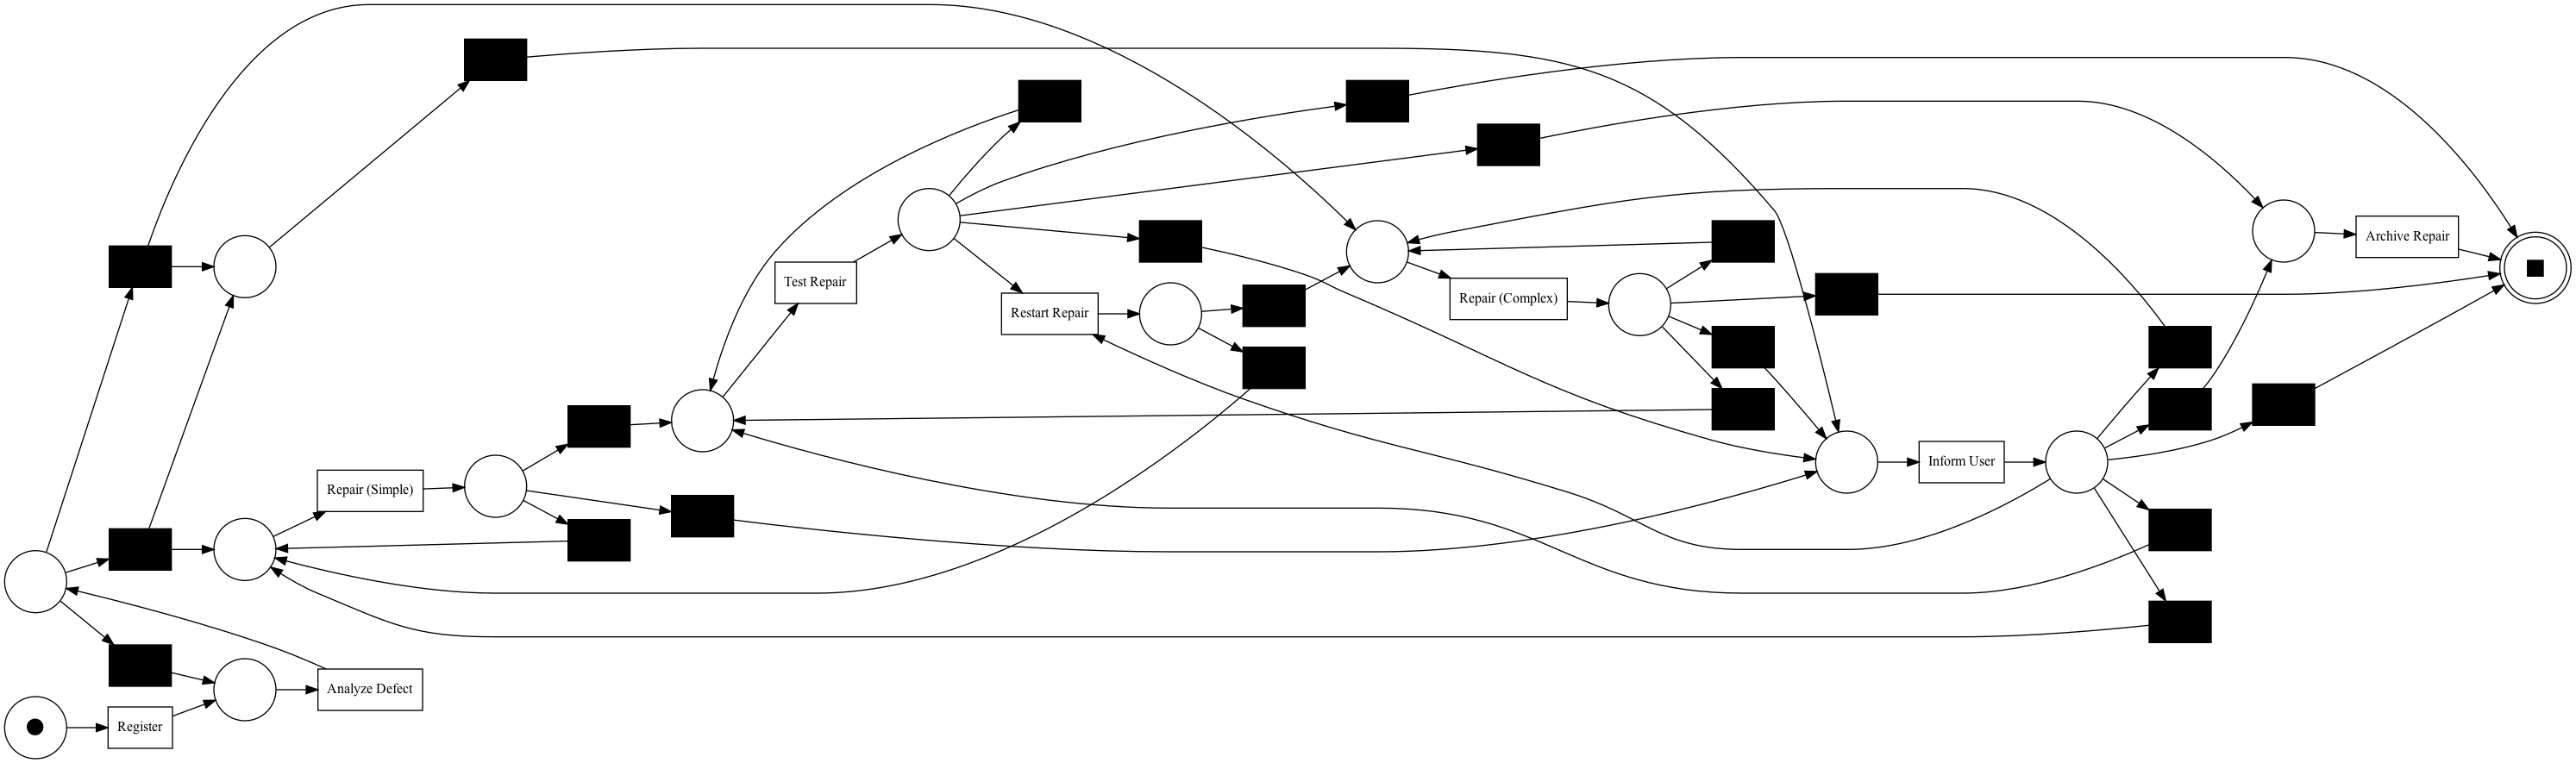

In [153]:

## Import the petrinet visualizer object
net, im, fm = heuristics_miner.apply(sub_log3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub event log

In [154]:

fitness = replay_fitness_evaluator.apply(sub_log3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 177/177 [00:00<00:00, 632.33it/s]

Fitness of Petrinet is:  96.73932101014802 %
Precision of Petrinet is:  48.21020563594821 %
Simplicity of Petrinet is:  55.55555555555556 %


# DB SCAN

## Hamming Distance

In [155]:
from sklearn.cluster import DBSCAN
clustering_DB_Hamm = DBSCAN(eps=0.1, min_samples=100, metric ='hamming').fit(np_vectors)


clustering_DB_Hamm = clustering_DB_Hamm.fit_predict(np_vectors)
clustering_DB_Hamm
# clustered = clustering.labels_
# clustered


array([ 0,  0,  0, ..., -1,  0, -1])

### Size of Clusters

In [156]:
# Removing Negative values by scaling by 1
for i in range(len(clustering_DB_Hamm)):
    clustering_DB_Hamm[i]=clustering_DB_Hamm[i]+1
count_arr_DB1 = np.bincount(clustering_DB_Hamm)
print(count_arr_DB1)

[281 823]


## Creating Sub Event Logs based on Clustering Output

In [157]:
length1  = count_arr_DB1[0]
length2 = count_arr_DB1[1]
# length3 = count_arr_DB1[2]
# length4 = count_arr_DB1[3]

sub_log1_DB1 = EventLog()
sub_log2_DB1 = EventLog()
# sub_log3_DB1 = EventLog()
# sub_log4_DB1 = EventLog()

for i in range(len(clustering_DB_Hamm)):
    if clustering_DB_Hamm[i] == 0:
        sub_log1_DB1.append(log[i])
    
    elif clustering_DB_Hamm[i] == 1:
        sub_log2_DB1.append(log[i])
        
    # elif clustering_DB_Hamm[i] == 2: 
    #     sub_log3_DB1.append(log[i])

    # elif clustering_DB_Hamm[i] == 3: 
    #     sub_log4_DB1.append(log[i])

 

## Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Hamming Distance

### Petrinets from Alpha miner on Sub Event Log1

### Log Fitness and Precision of SubLog1

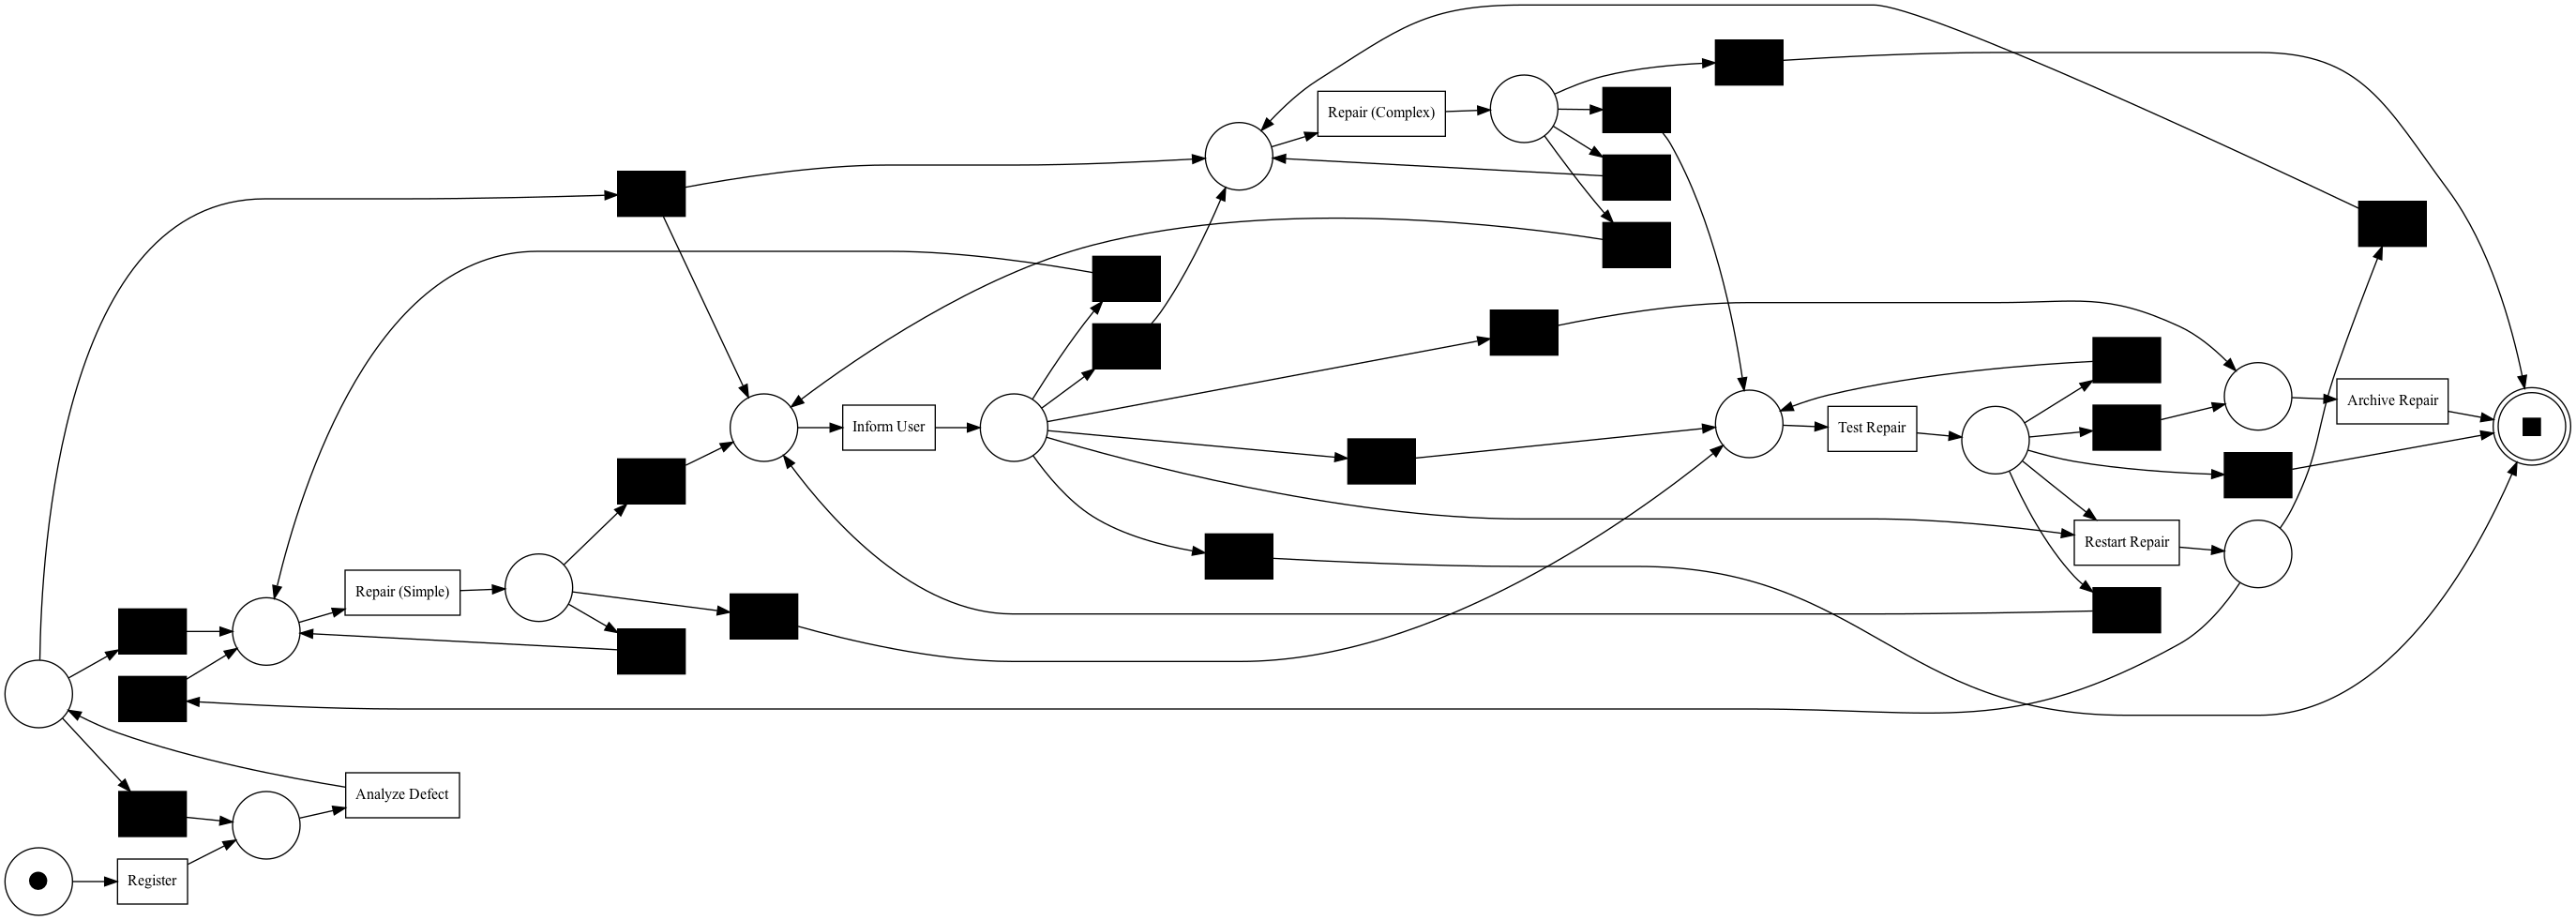

replaying log with TBR, completed variants :: 100%|██████████| 182/182 [00:00<00:00, 537.15it/s]

Fitness of Petrinet is:  97.50052136646138 %
Precision of Petrinet is:  46.81418288456412 %
Simplicity of Petrinet is:  55.84415584415584 %


In [158]:
net, im, fm = heuristics_miner.apply(sub_log1_DB1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log1_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log2

## Log Fitness and Precision of SubLog2

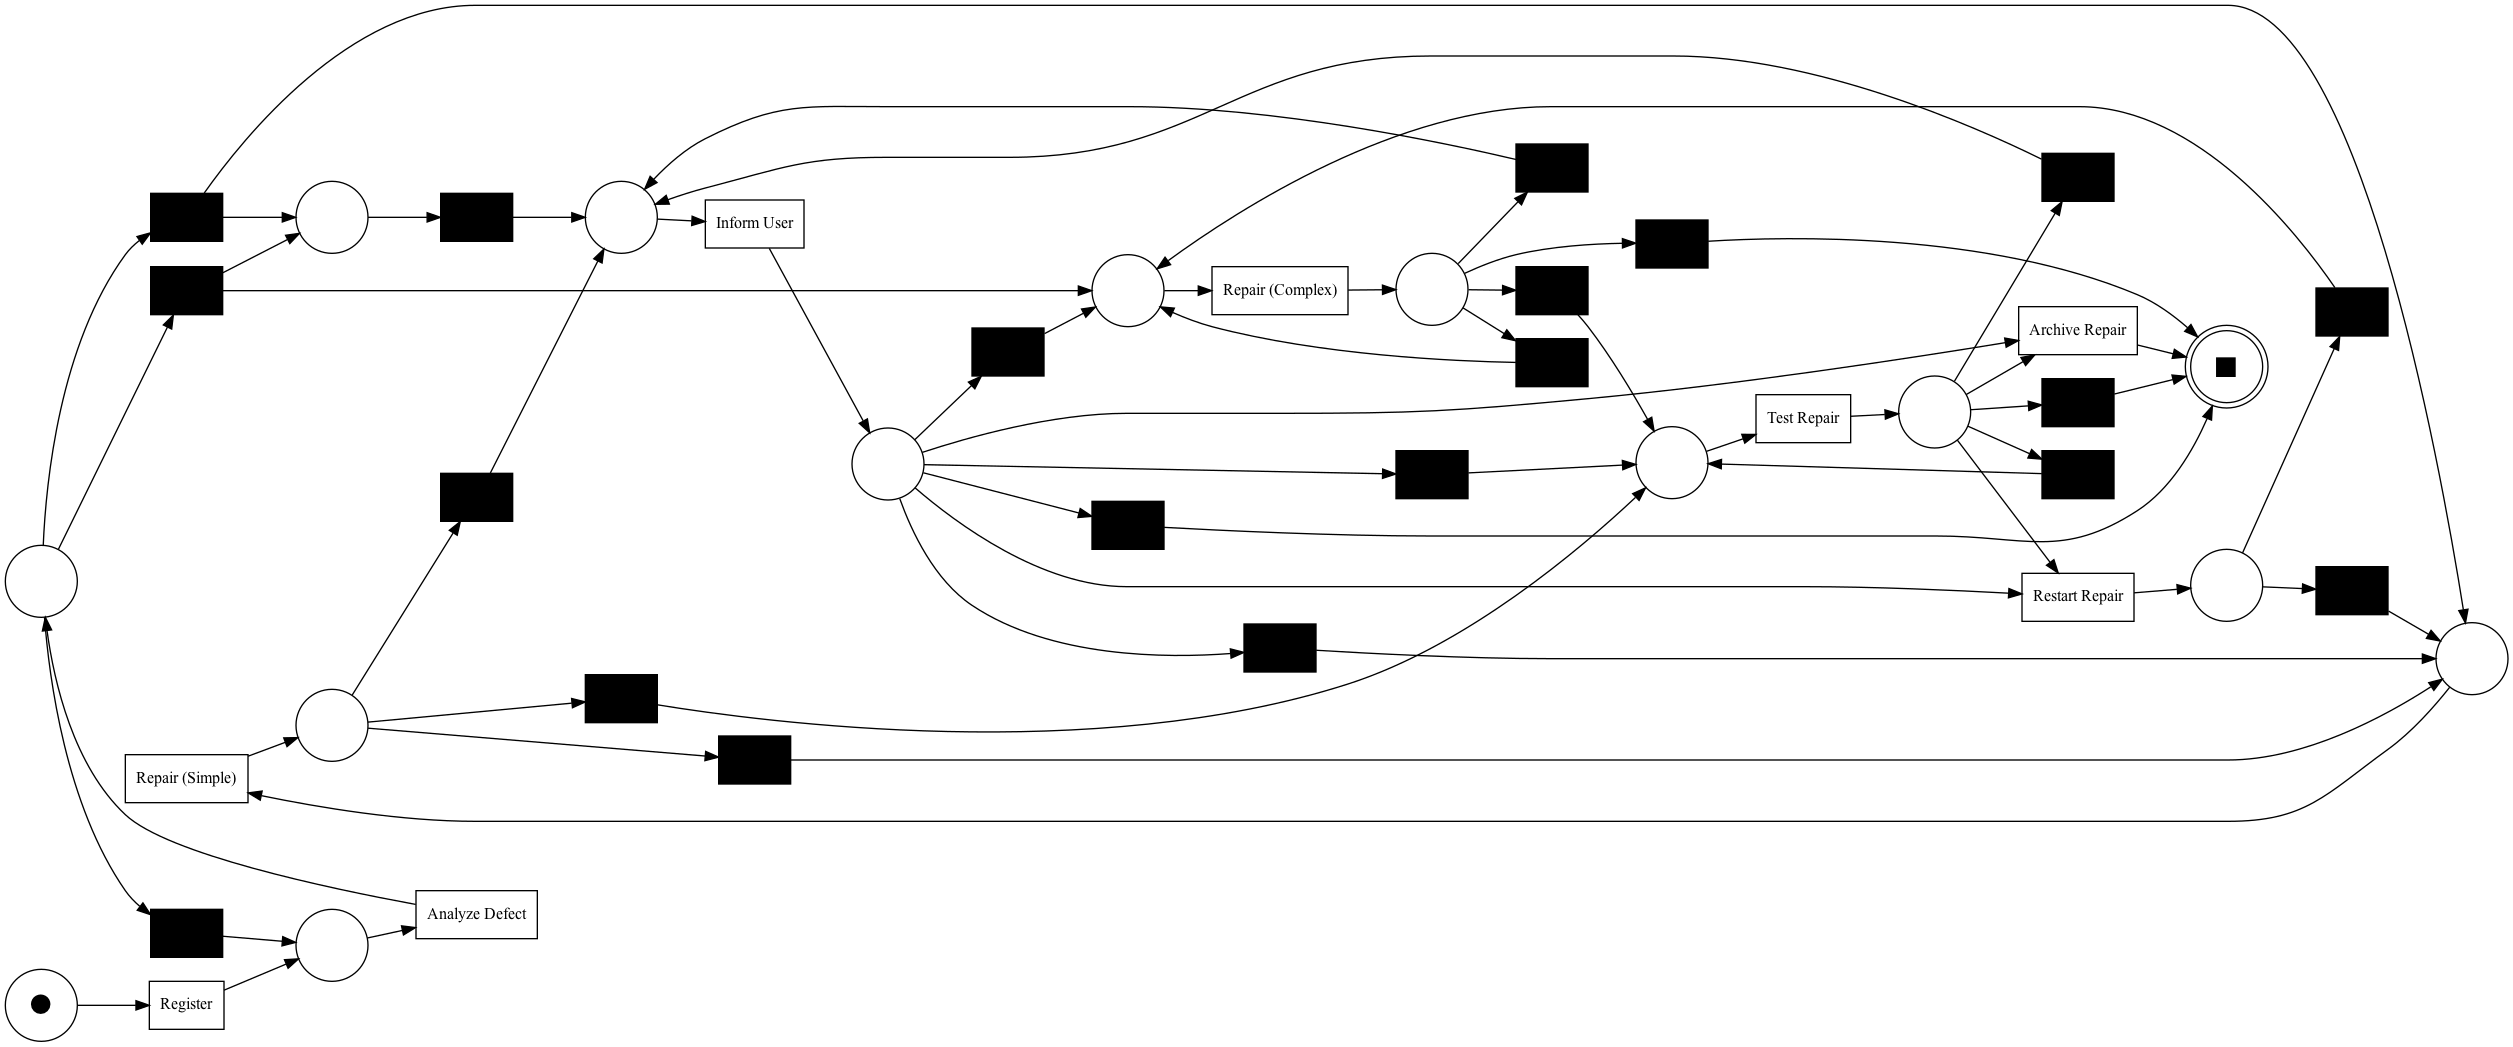

replaying log with TBR, completed variants :: 100%|██████████| 206/206 [00:00<00:00, 483.60it/s]

Fitness of Petrinet is:  94.47228505615244 %
Precision of Petrinet is:  50.72664715246752 %
Simplicity of Petrinet is:  53.84615384615385 %


In [159]:
net, im, fm = heuristics_miner.apply(sub_log2_DB1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log2_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

# DB Scan 
## Euclidean Distance

In [160]:
from sklearn.cluster import DBSCAN
clustering_DB_Euclidean = DBSCAN(eps=1, min_samples=100, metric ='euclidean').fit(np_vectors)


clustering_DB_Euclidean = clustering_DB_Euclidean.fit_predict(np_vectors)
clustering_DB_Euclidean
# clustered = clustering.labels_
# clustered


array([ 0,  0,  0, ..., -1, -1, -1])

### Size of Clusters

In [161]:
# Removing Negative values by scaling by 1
for i in range(len(clustering_DB_Euclidean)):
    clustering_DB_Euclidean[i]= clustering_DB_Euclidean[i]+1
count_arr_DB2 = np.bincount(clustering_DB_Euclidean)
print(count_arr_DB2)


[318 786]


## Creating Sub Event Logs based on Clustering Output

In [162]:
length1  = count_arr_DB2[0]
length2 = count_arr_DB2[1]


sub_log1_DB2 = EventLog()
sub_log2_DB2 = EventLog()


for i in range(len(clustering_DB_Euclidean)):
    if clustering_DB_Euclidean[i] == 0:
        sub_log1_DB2.append(log[i])
    
    elif clustering_DB_Euclidean[i] == 1:
        sub_log2_DB2.append(log[i])
 

## Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Euclidean Distance

### Petrinets from Alpha miner on Sub Event Log1

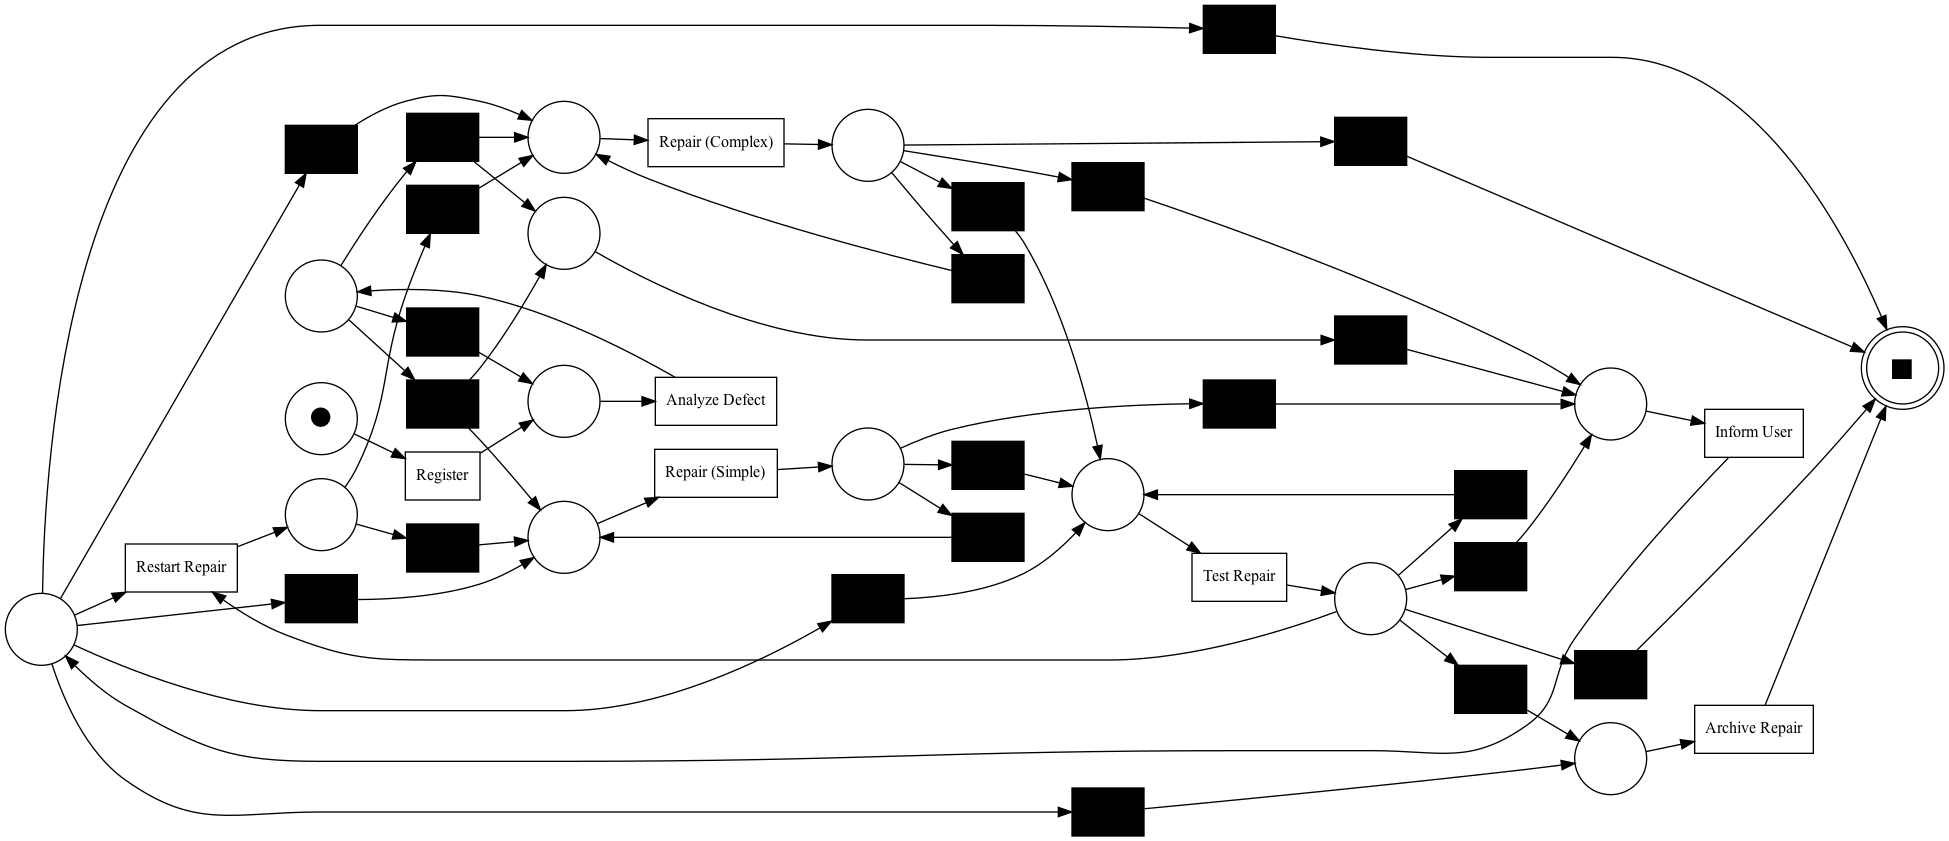

replaying log with TBR, completed variants :: 100%|██████████| 204/204 [00:00<00:00, 437.42it/s]

Fitness of Petrinet is:  96.74985231371916 %
Precision of Petrinet is:  47.99574317133736 %
Simplicity of Petrinet is:  55.55555555555556 %


In [163]:
net, im, fm = heuristics_miner.apply(sub_log1_DB2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log1_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log2

## Log Fitness and Precision of SubLog2

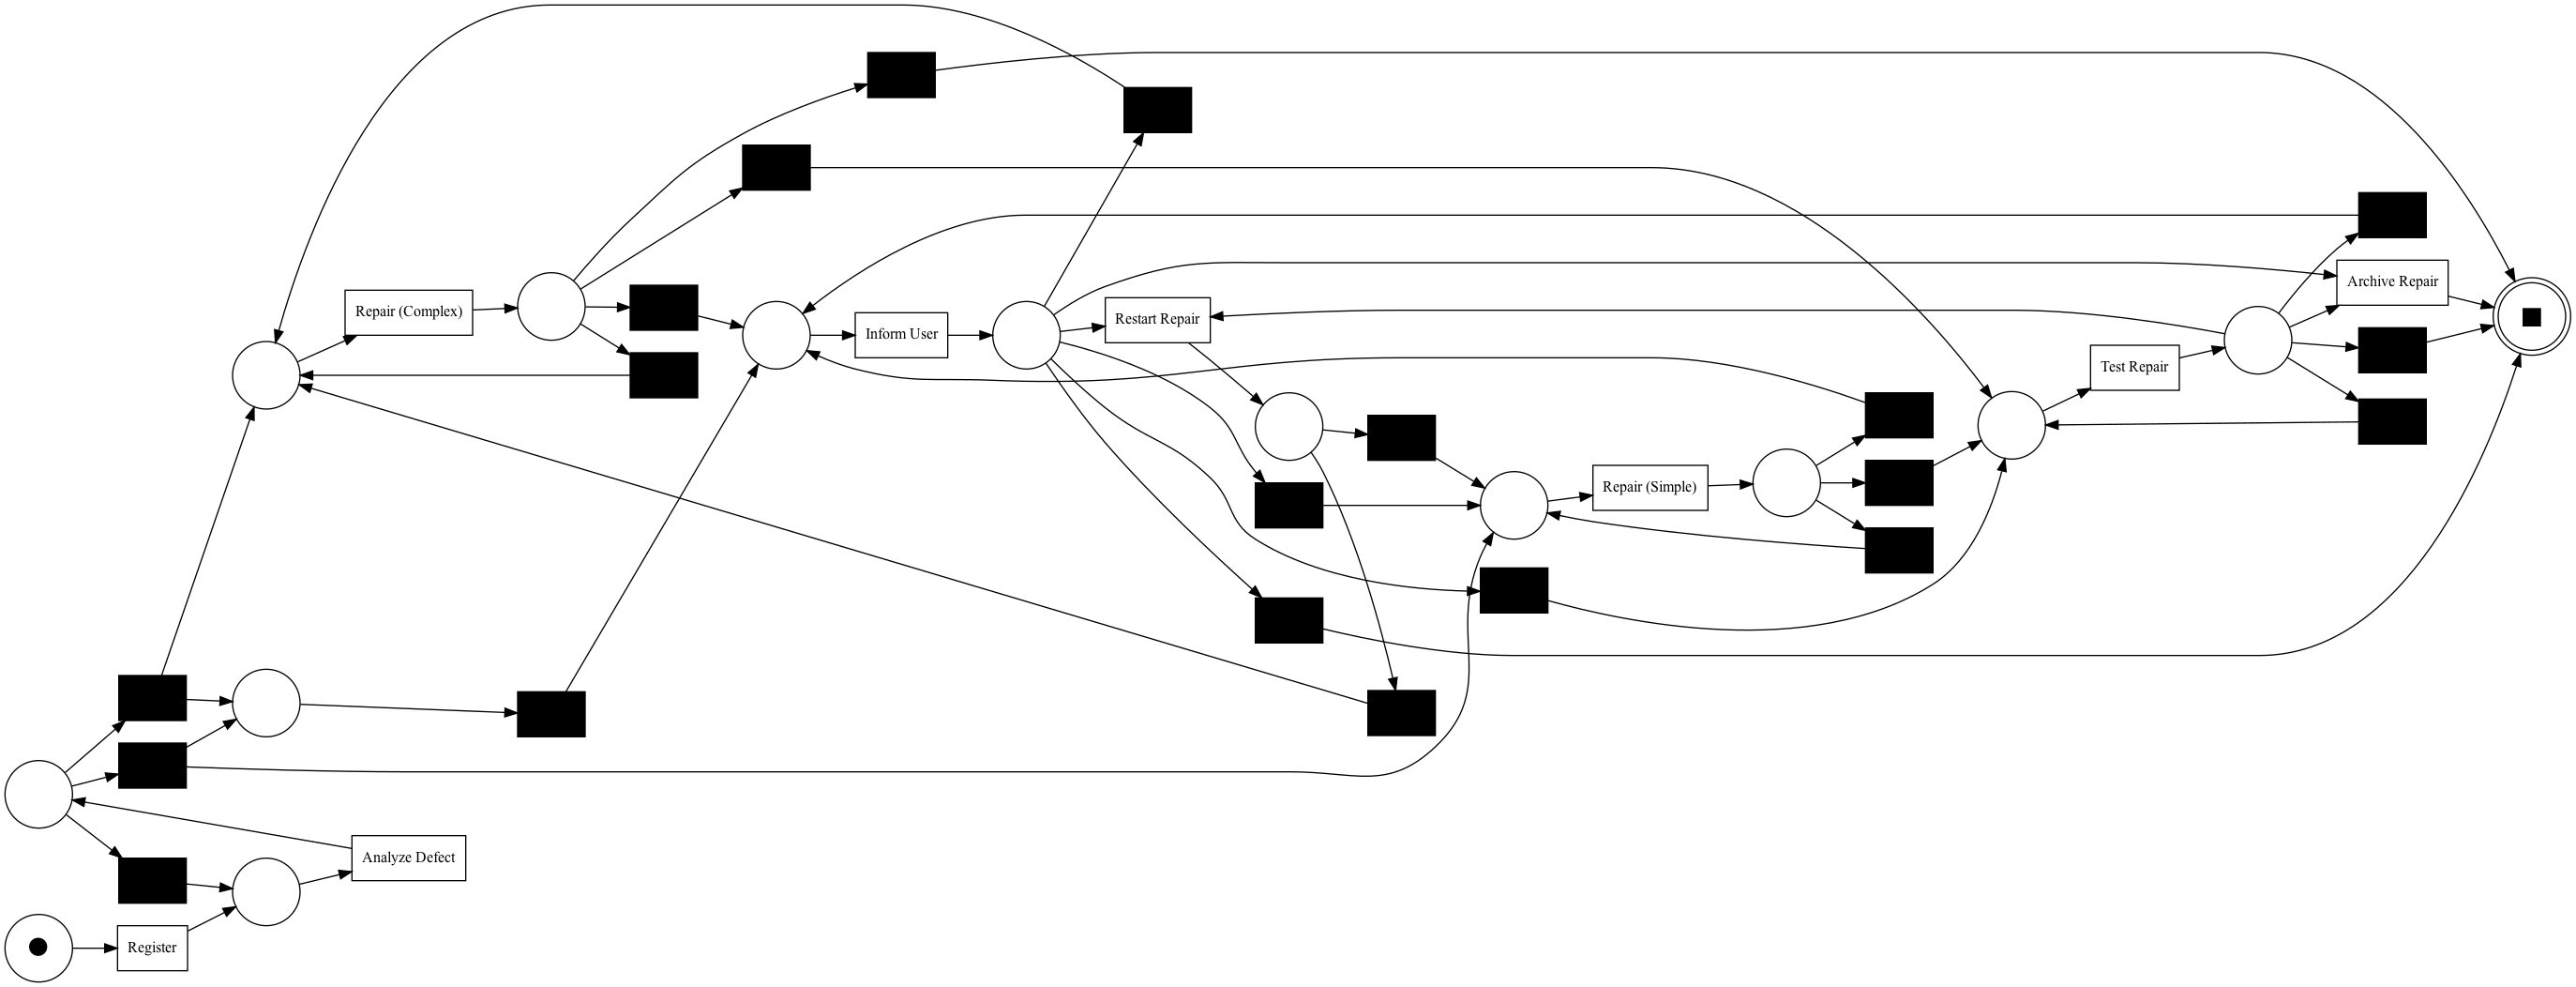

replaying log with TBR, completed variants :: 100%|██████████| 197/197 [00:00<00:00, 538.46it/s]

Fitness of Petrinet is:  94.46961975938916 %
Precision of Petrinet is:  50.83467959073775 %
Simplicity of Petrinet is:  53.84615384615385 %


In [164]:

net, im, fm = heuristics_miner.apply(sub_log2_DB2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log2_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

# DB Scan
## Jaccard  Distance

In [165]:
from sklearn.cluster import DBSCAN
clustering_DB_Jaccard = DBSCAN(eps=0.3, min_samples=100, metric ='jaccard').fit(np_vectors)
clustering_DB_Jaccard = clustering_DB_Jaccard.fit_predict(np_vectors)
clustering_DB_Jaccard
# clustered = clustering.labels_
# clustered

array([ 0,  1,  0, ...,  0, -1, -1])

In [166]:
# Removing Negative values by scaling by 1
for i in range(len(clustering_DB_Jaccard)):
    clustering_DB_Jaccard[i]=clustering_DB_Jaccard[i]+1
count_arr_DB3 = np.bincount(clustering_DB_Jaccard)
print(count_arr_DB3)

[738 132 103  40  46  38   7]


## Creating Sub Event Logs based on Clustering Output

In [167]:
length1  = count_arr_DB3[0]
length2 = count_arr_DB3[1]
length3 = count_arr_DB3[2]
length4 = count_arr_DB3[3]
# length5 = count_arr_DB2[4]

sub_log1_DB3 = EventLog()
sub_log2_DB3 = EventLog()
sub_log3_DB3 = EventLog()
sub_log4_DB3 = EventLog()
# sub_log5_DB2 = EventLog()

for i in range(len(clustering_DB_Jaccard)):
    if clustering_DB_Jaccard[i] == 0:
        sub_log1_DB3.append(log[i])
    
    elif clustering_DB_Jaccard[i] == 1:
        sub_log2_DB3.append(log[i])
        
    elif clustering_DB_Jaccard[i] == 2: 
        sub_log3_DB3.append(log[i])
    elif clustering_DB_Jaccard[i] == 3: 
        sub_log4_DB3.append(log[i])


# Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Jaccard Distance

## Petrinets from Alpha miner on Sub Event Log1

## Log Fitness and Precision of SubLog1

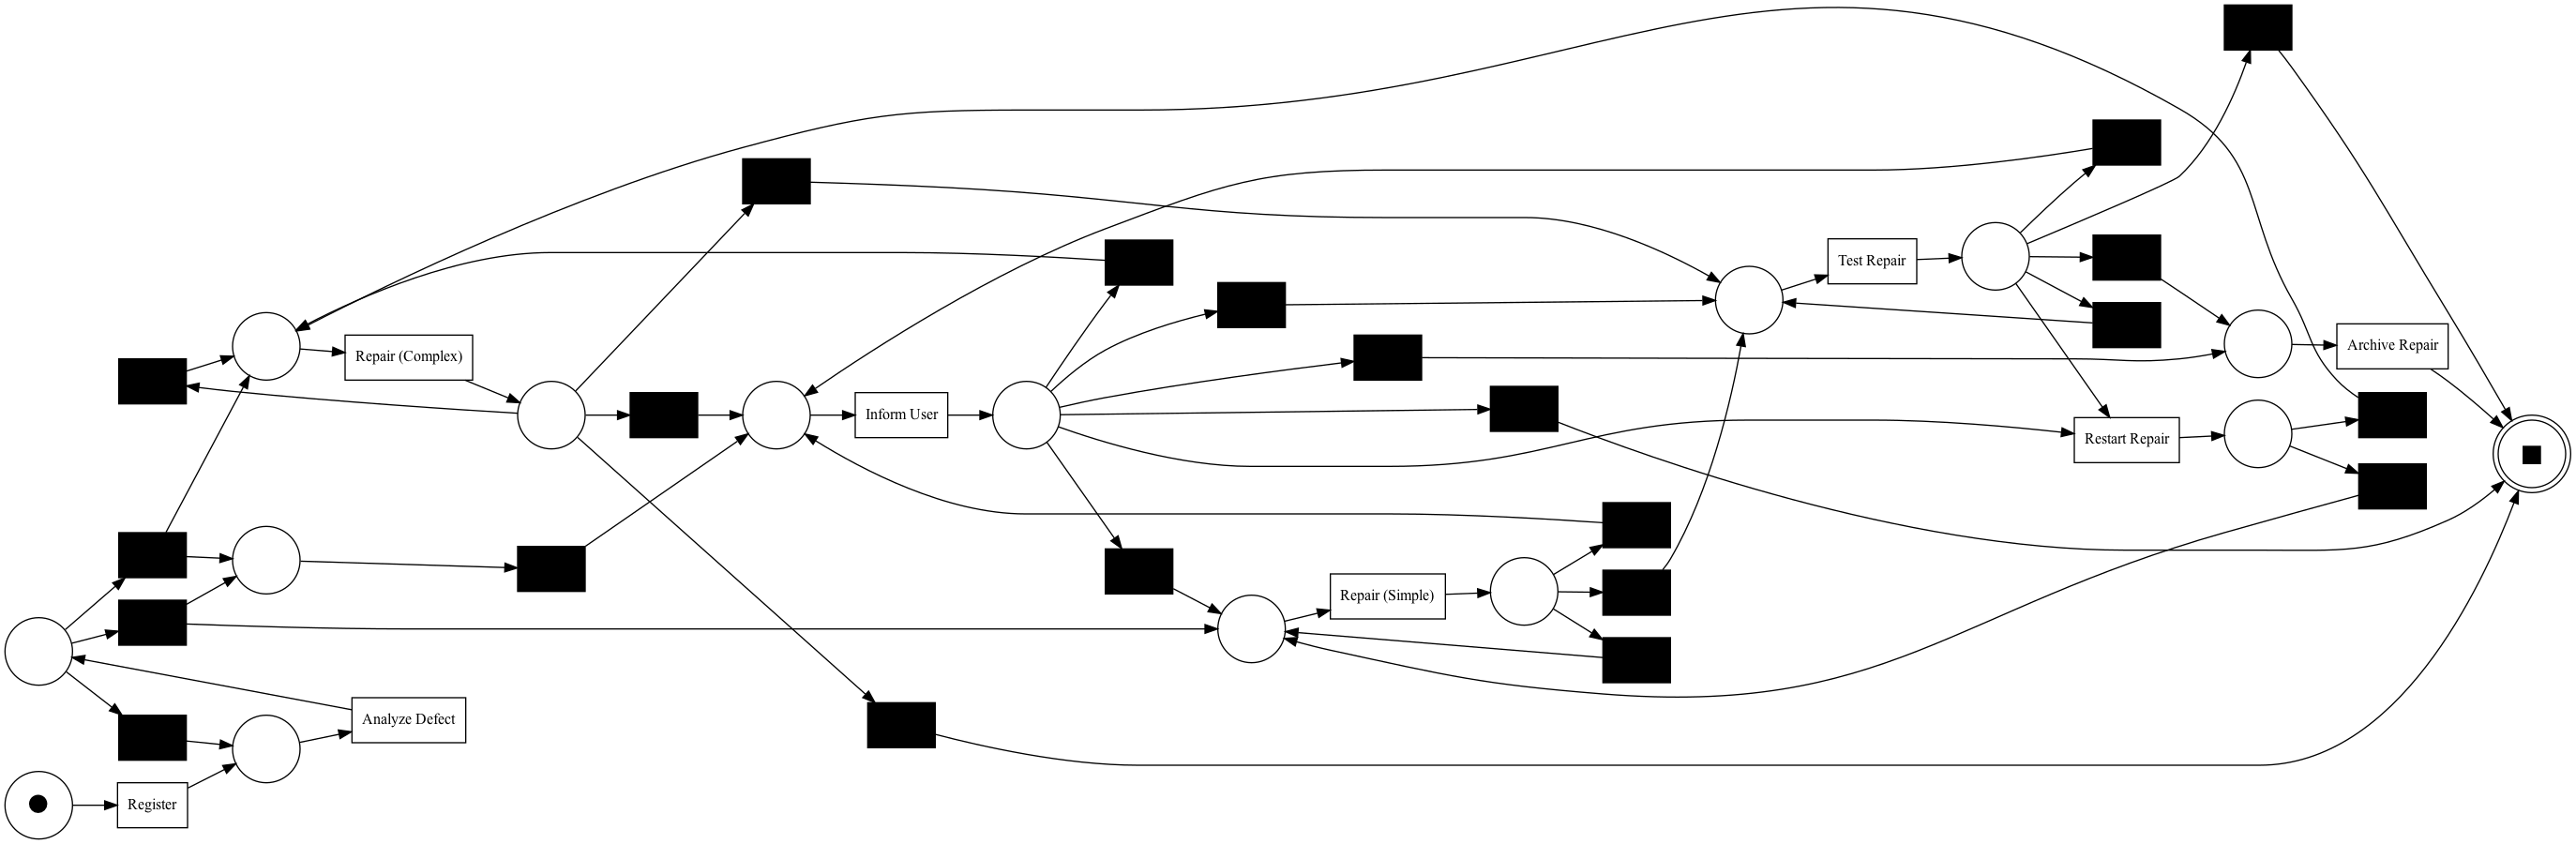

replaying log with TBR, completed variants :: 100%|██████████| 219/219 [00:00<00:00, 565.88it/s]

Fitness of Petrinet is:  96.78907318077685 %
Precision of Petrinet is:  47.35574459362509 %
Simplicity of Petrinet is:  55.55555555555556 %


In [168]:
net, im, fm = heuristics_miner.apply(sub_log1_DB3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log1_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')


## Petrinets from Alpha miner on Sub Event Log2

## Log Fitness and Precision of SubLog2

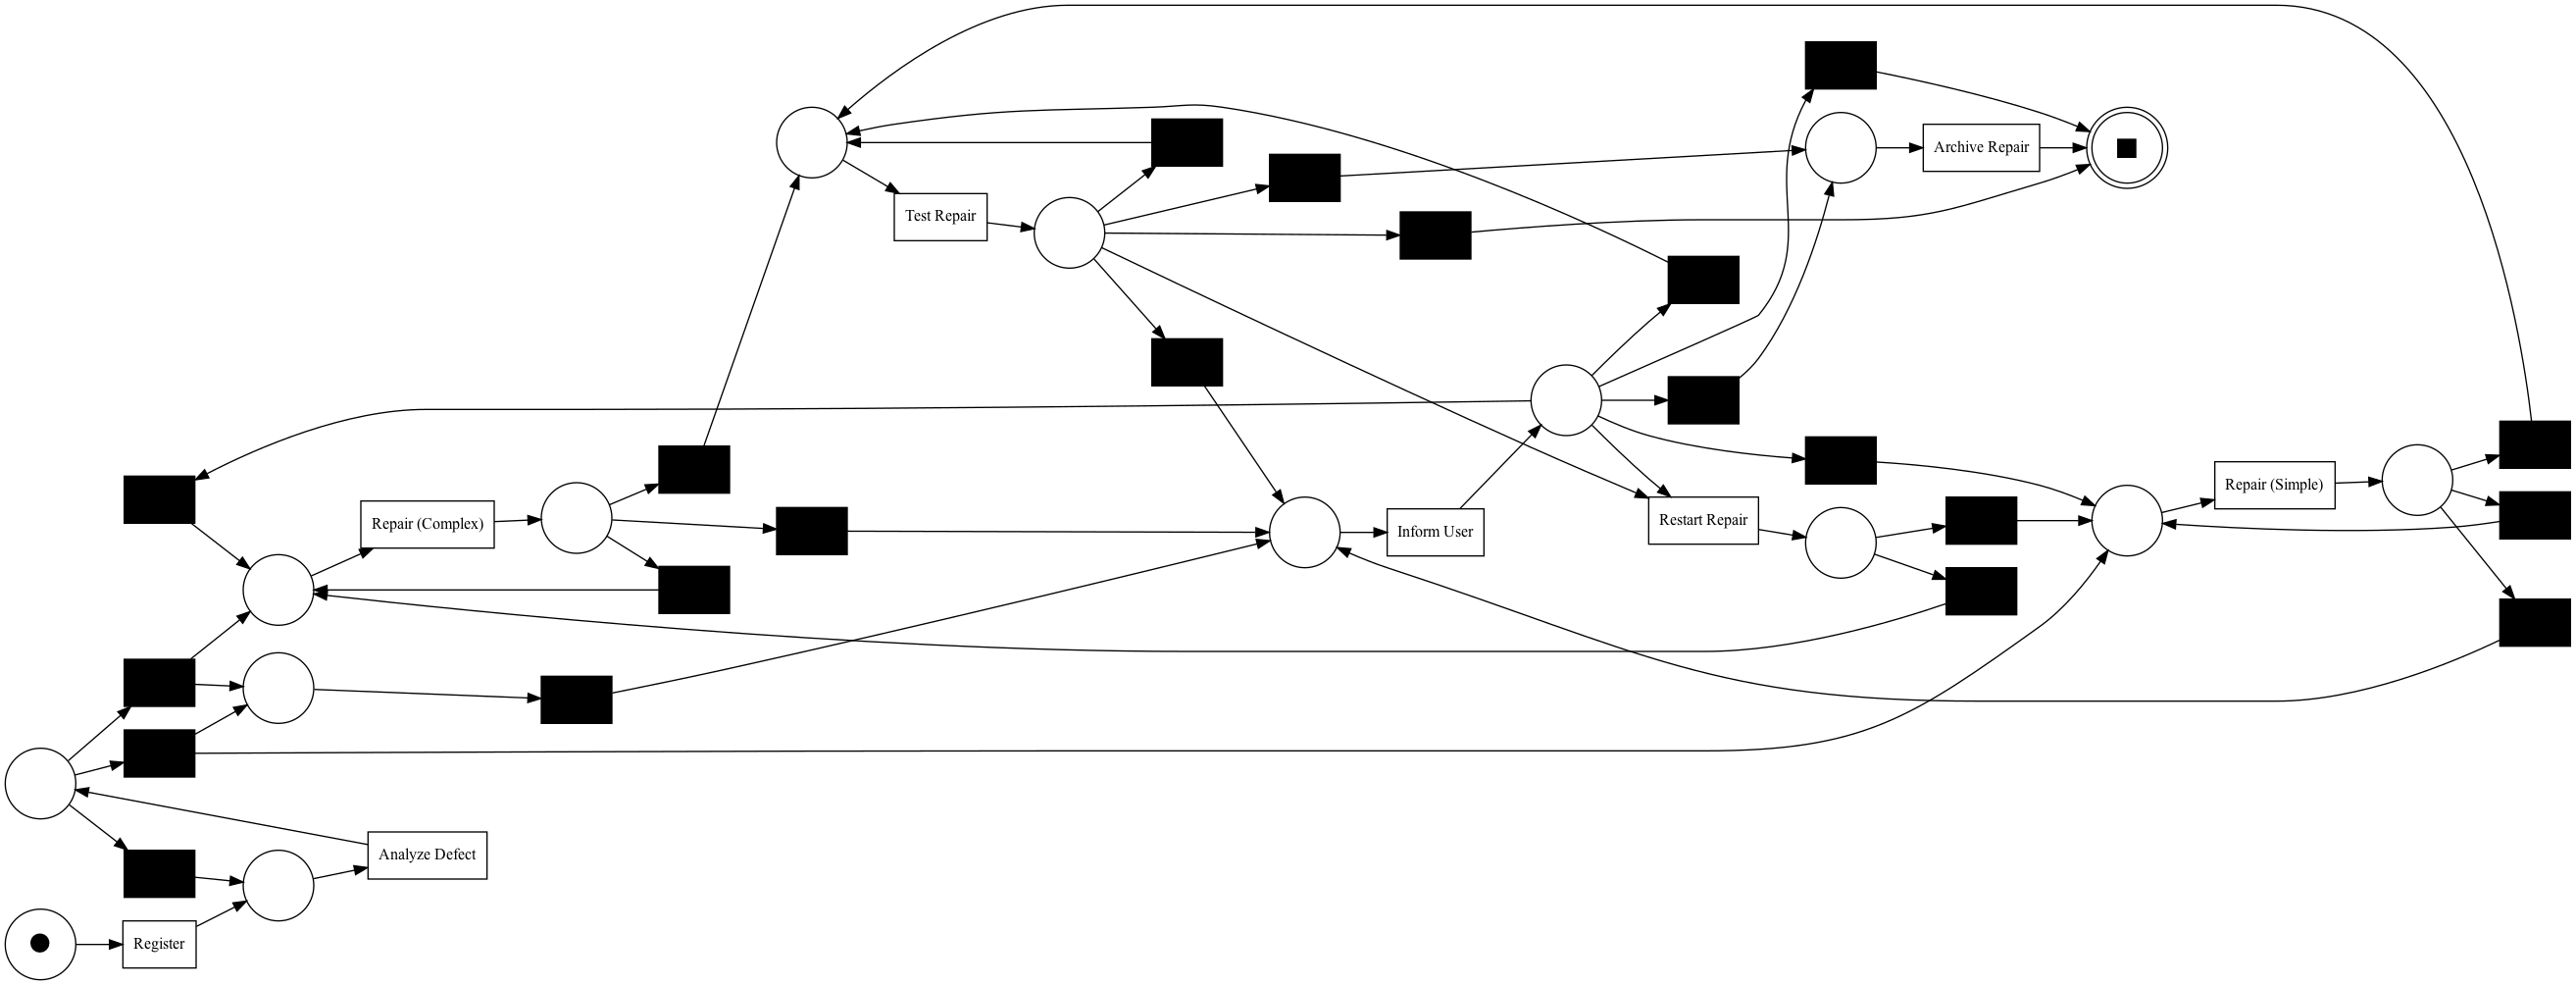

replaying log with TBR, completed variants :: 100%|██████████| 135/135 [00:00<00:00, 714.87it/s]

Fitness of Petrinet is:  96.65892672858617 %
Precision of Petrinet is:  47.306925049871765 %
Simplicity of Petrinet is:  56.4102564102564 %


In [169]:

net, im, fm = heuristics_miner.apply(sub_log2_DB3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log2_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')


## Petrinets from Alpha miner on Sub Event Log3

## Log Fitness and Precision of Sub Event log 3

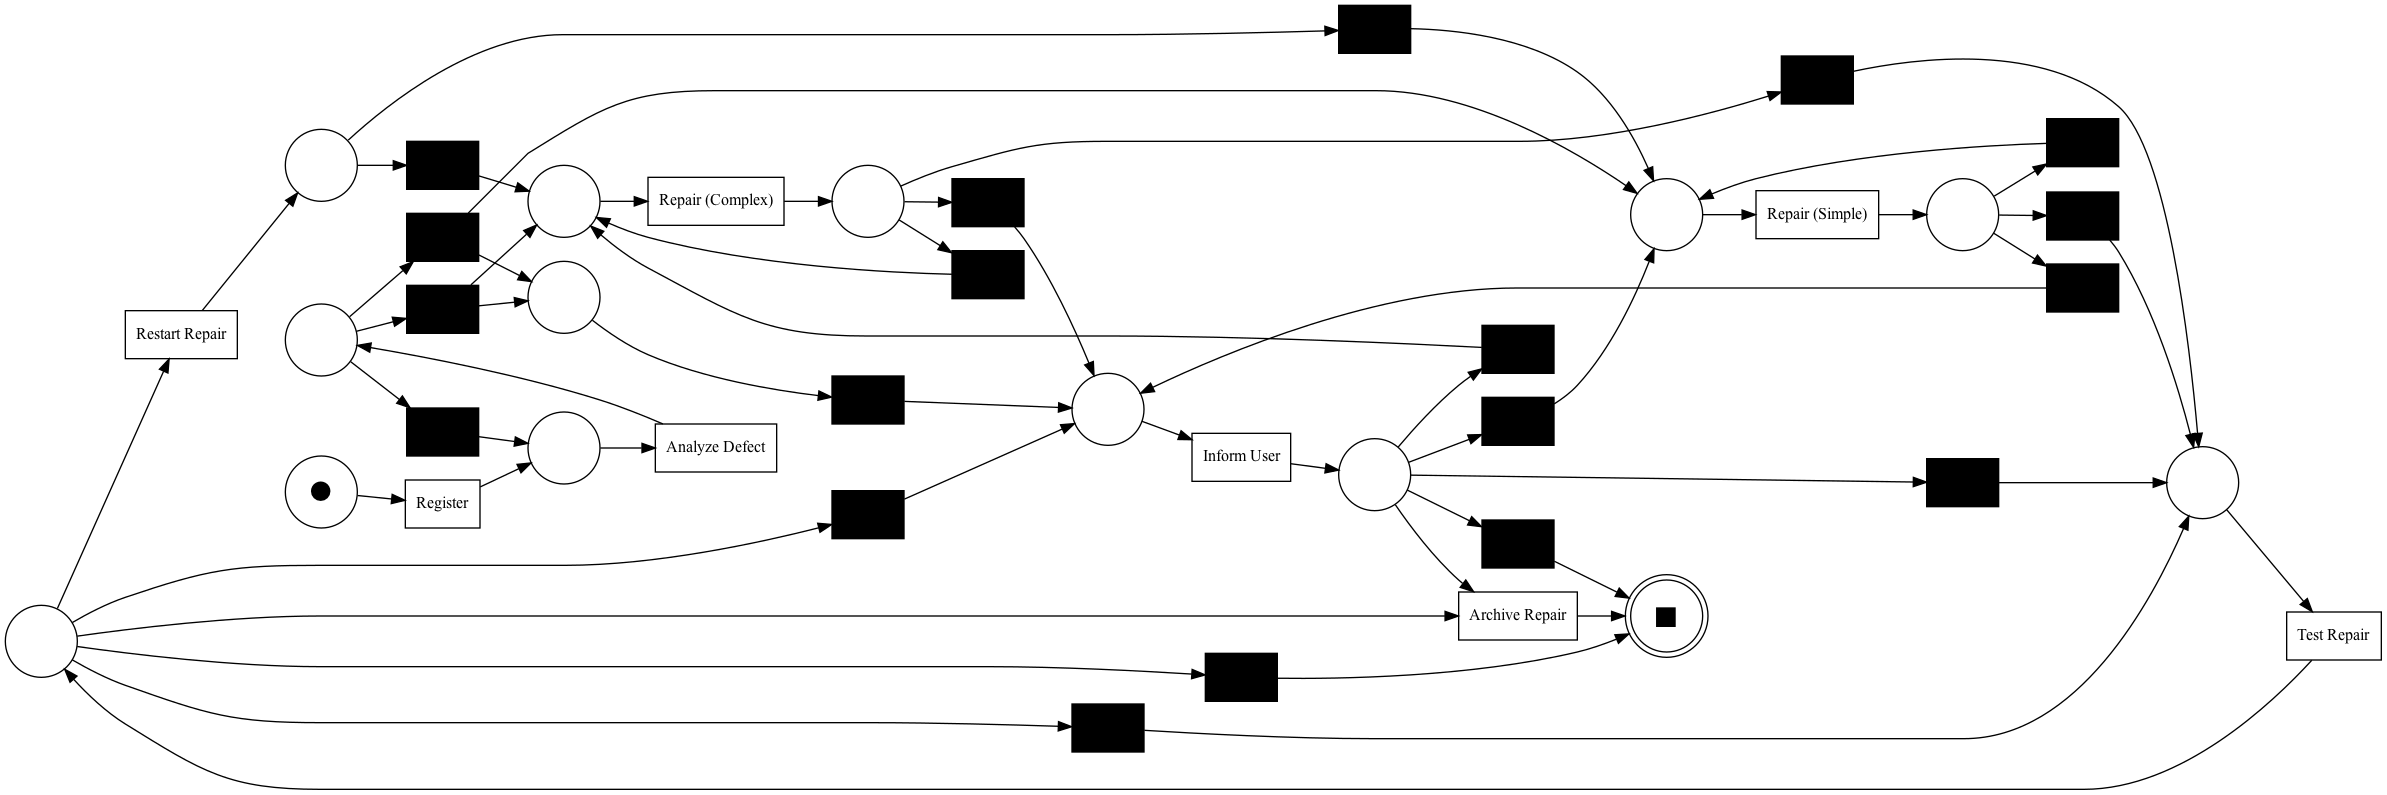

replaying log with TBR, completed variants :: 100%|██████████| 136/136 [00:00<00:00, 637.99it/s]

Fitness of Petrinet is:  95.1150228802038 %
Precision of Petrinet is:  45.86559306286776 %
Simplicity of Petrinet is:  56.16438356164384 %


In [170]:
net, im, fm = heuristics_miner.apply(sub_log3_DB3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log3_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

# Agglomerative Clustering
## Euclidean

In [171]:

from sklearn.cluster import AgglomerativeClustering

clustering_Agglomerative = AgglomerativeClustering(n_clusters=3,affinity='euclidean').fit(np_vectors)
clustering_Agglomerative =clustering_Agglomerative.labels_
clustering_Agglomerative

array([0, 0, 0, ..., 0, 0, 1])

In [172]:
count_arr_Aglomerative = np.bincount(clustering_Agglomerative)
print(count_arr_Aglomerative)


[707 204 193]


## Creating Sub Event Logs based on Clustering Output

In [173]:
length1  = count_arr_Aglomerative[0]
length2 = count_arr_Aglomerative[1]
length3 = count_arr_Aglomerative[2]
# length4 = count_arr_DB2[3]
# length5 = count_arr_DB2[4]

sub_log1_AG = EventLog()
sub_log2_AG = EventLog()
sub_log3_AG = EventLog()
# sub_log4_DB2 = EventLog()
# sub_log5_DB2 = EventLog()

for i in range(len(clustering_Agglomerative)):
    if clustering_Agglomerative[i] == 0:
        sub_log1_AG.append(log[i])
    
    elif clustering_Agglomerative[i] == 1:
        sub_log2_AG.append(log[i])
        
    elif clustering_Agglomerative[i] == 2: 
        sub_log3_AG.append(log[i])


# Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Euclidean Distance

## Petrinets from Alpha miner on Sub Event Log1

## Log Fitness and Precision of SubLog1

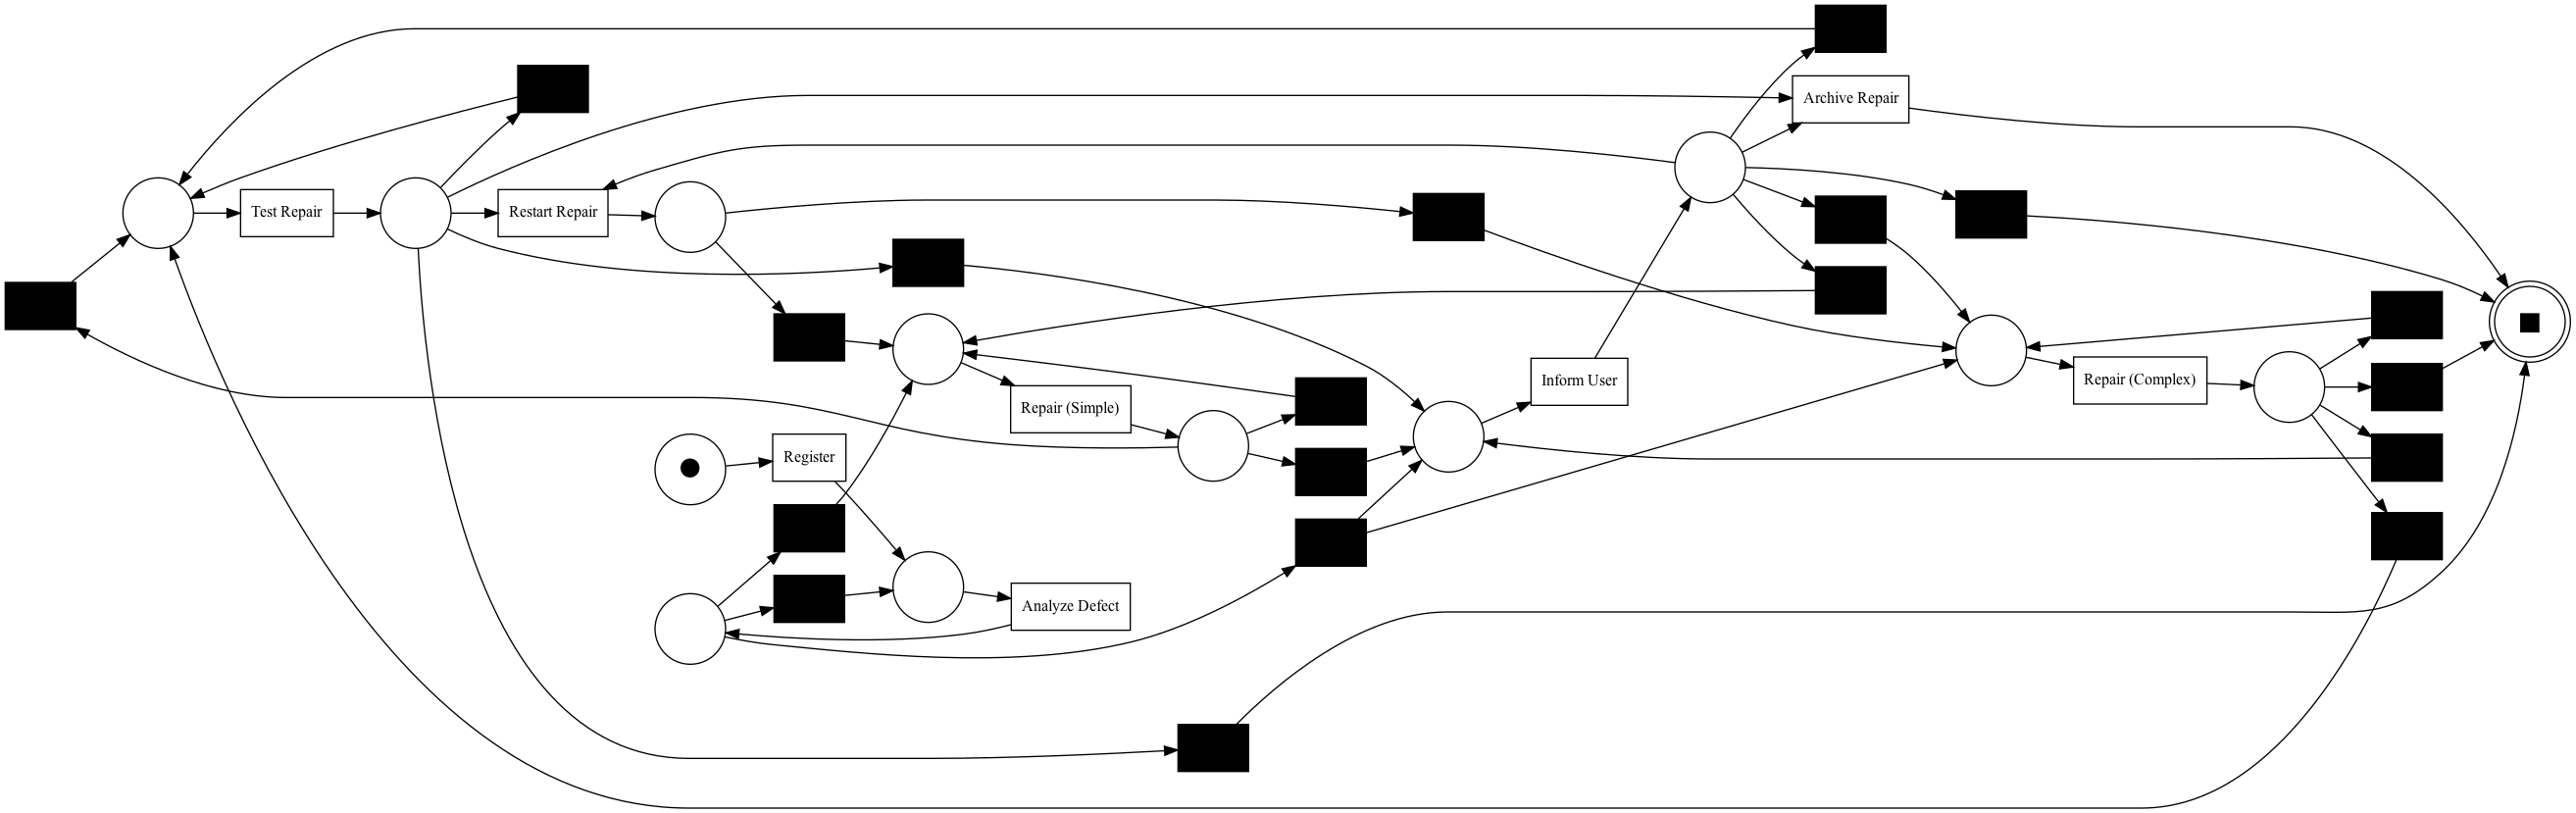

replaying log with TBR, completed variants :: 100%|██████████| 201/201 [00:00<00:00, 881.68it/s]

Fitness of Petrinet is:  95.88611297975783 %
Precision of Petrinet is:  50.87893476610408 %
Simplicity of Petrinet is:  54.05405405405405 %


In [174]:

net, im, fm = heuristics_miner.apply(sub_log1_AG, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log1_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log2

## Log Fitness and Precision of SubLog2

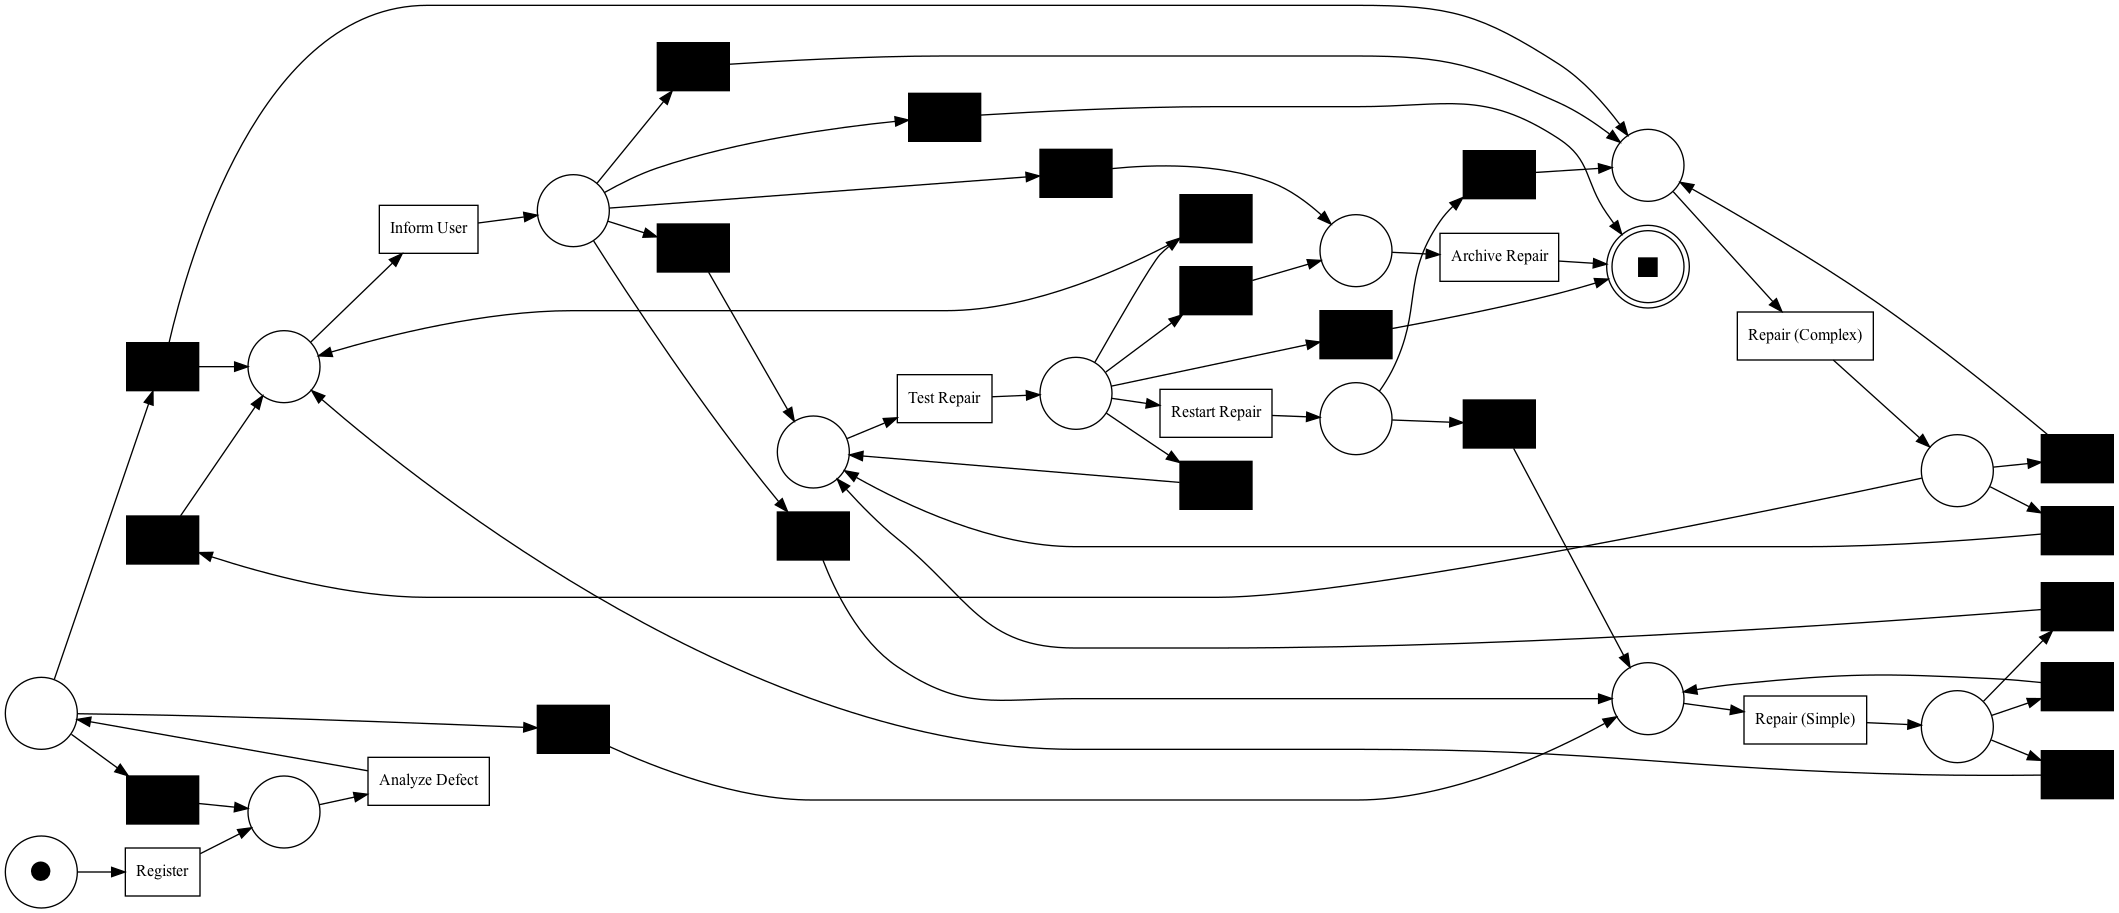

replaying log with TBR, completed variants :: 100%|██████████| 187/187 [00:00<00:00, 616.87it/s]

Fitness of Petrinet is:  98.27197995029604 %
Precision of Petrinet is:  45.33035963200446 %
Simplicity of Petrinet is:  58.33333333333333 %


In [175]:

net, im, fm = heuristics_miner.apply(sub_log2_AG, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log2_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log3

## Log Fitness and Precision of Sub Event log 3

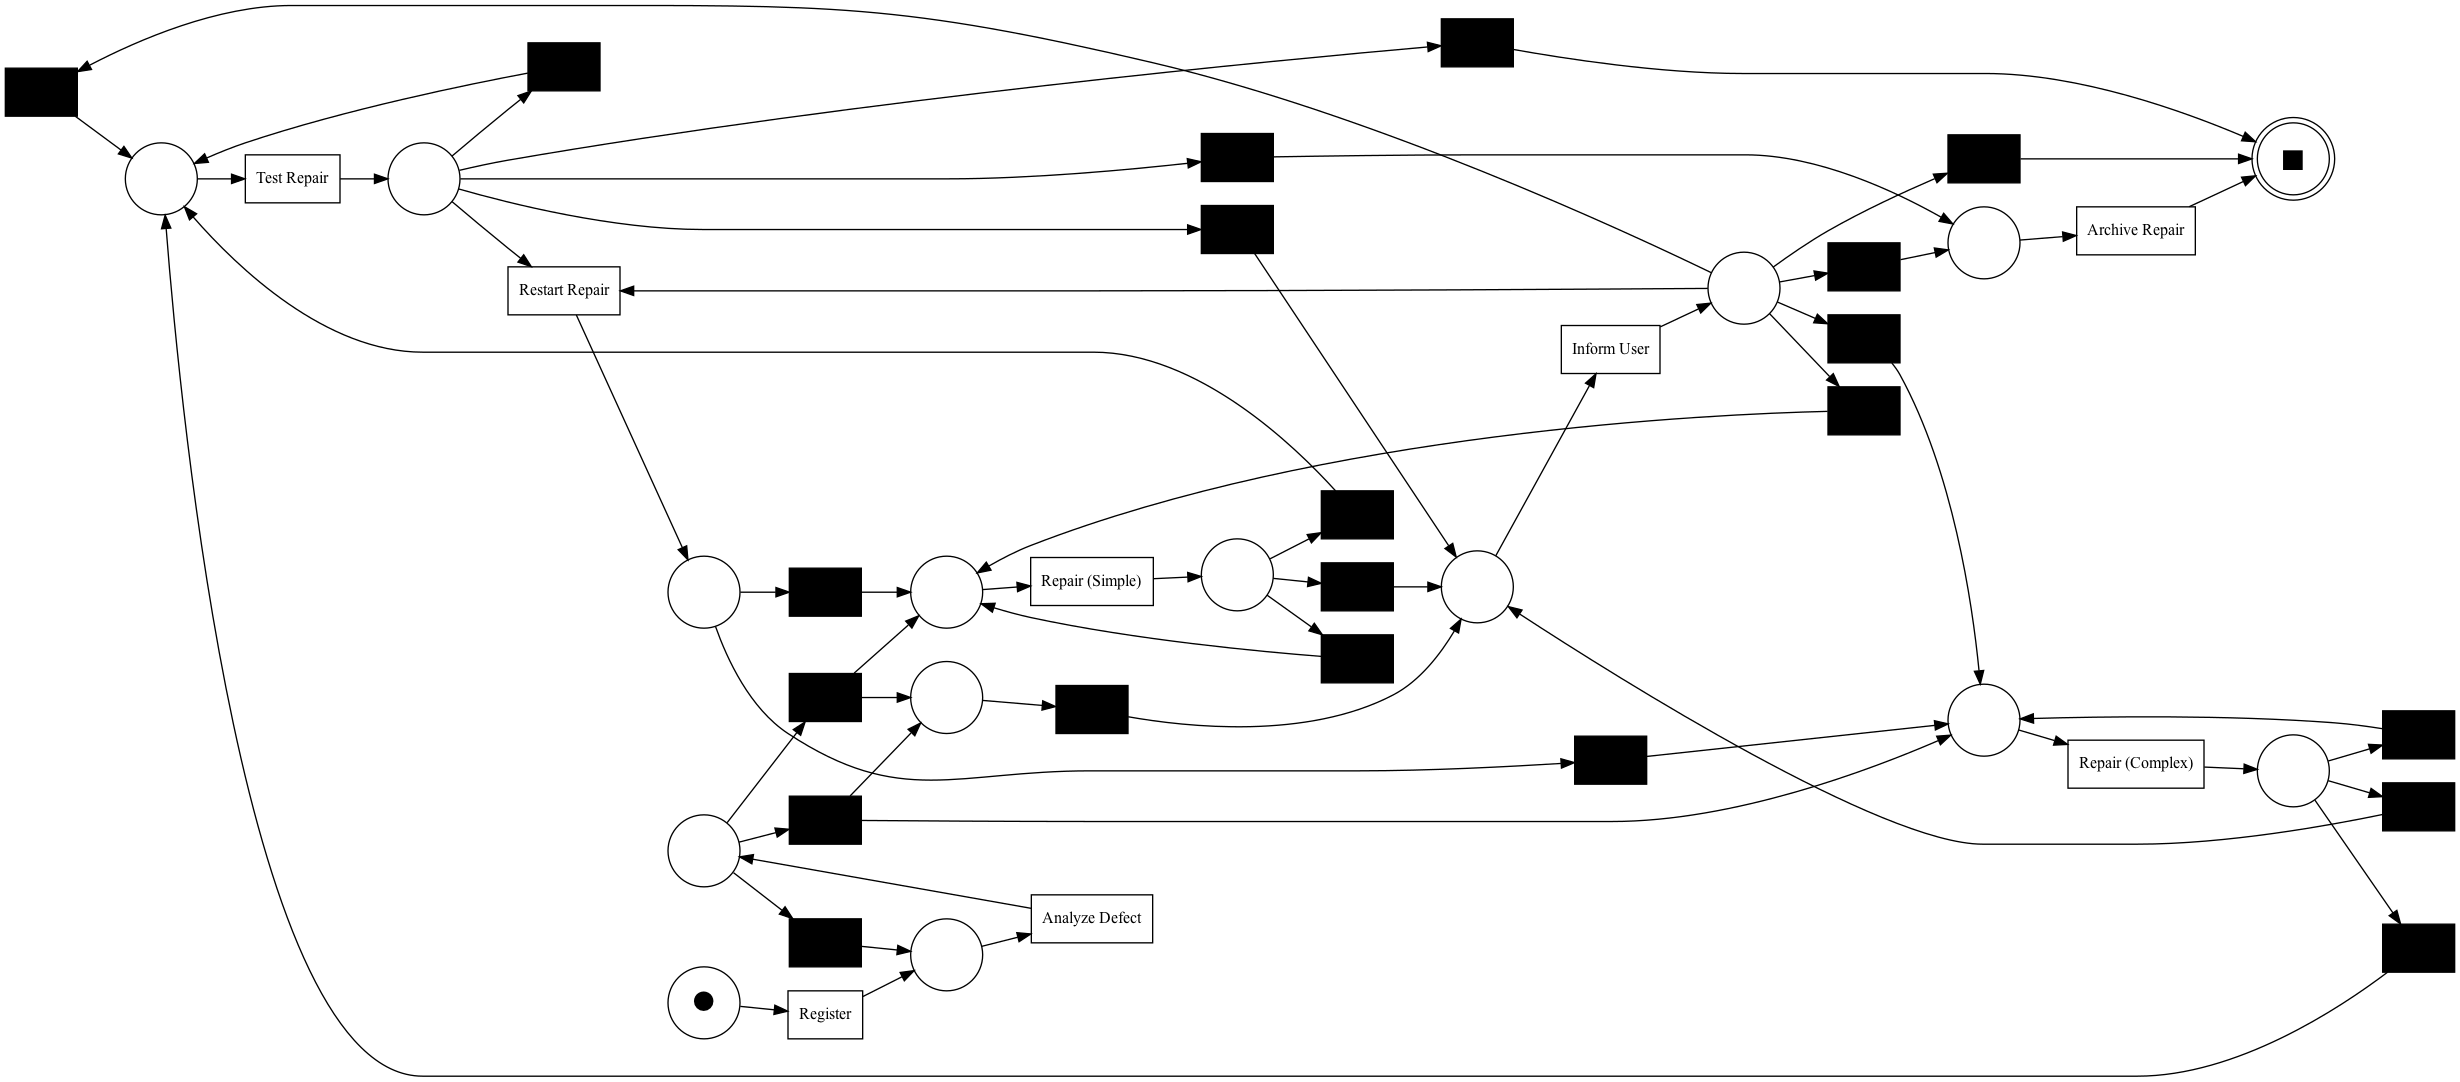

replaying log with TBR, completed variants :: 100%|██████████| 153/153 [00:00<00:00, 664.62it/s]

Fitness of Petrinet is:  96.69556816809563 %
Precision of Petrinet is:  46.55274012964055 %
Simplicity of Petrinet is:  56.4102564102564 %


In [176]:

net, im, fm = heuristics_miner.apply(sub_log3_AG, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log3_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

# Self Organizing Maps - SOM


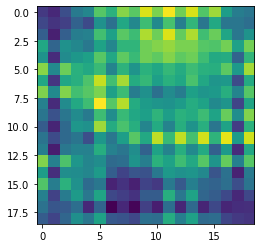

In [177]:
import susi
import numpy as np
import matplotlib.pyplot as plt
som = susi.SOMClustering()
som.fit(np_vectors)
umat = som.get_u_matrix()
clusters = som.get_bmus(np_vectors)
#print(clusters)
plt.imshow(np.squeeze(umat))

### Unique Clusters

In [178]:
unique_clusters = np.unique(clusters, axis=0)
unique_clusters

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [0, 7],
       [0, 8],
       [0, 9],
       [1, 0],
       [1, 1],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 9],
       [2, 0],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [2, 7],
       [2, 8],
       [2, 9],
       [3, 0],
       [3, 1],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [3, 7],
       [3, 8],
       [3, 9],
       [4, 0],
       [4, 4],
       [4, 5],
       [4, 6],
       [4, 7],
       [4, 8],
       [4, 9],
       [5, 0],
       [5, 1],
       [5, 2],
       [5, 3],
       [5, 4],
       [5, 5],
       [5, 6],
       [5, 7],
       [5, 8],
       [5, 9],
       [6, 0],
       [6, 4],
       [6, 5],
       [6, 6],
       [6, 7],
       [6, 9],
       [7, 0],
       [7, 7],
       [7, 9],
       [8, 4],
       [8, 8],
       [8, 9],
       [9, 0],
       [9, 1],
       [9,

## Making Sub Event Logs on the basis of SOM Clusters

In [179]:

som_sub_log1 = EventLog()
som_sub_log2 = EventLog()
som_sub_log3 = EventLog()
som_sub_log4 = EventLog()
som_sub_log5 = EventLog()
som_sub_log6 = EventLog()
som_sub_log7 = EventLog()
som_sub_log8 = EventLog()
som_sub_log9 = EventLog()
som_sub_log10 = EventLog()

for i in range(len(clusters)):
    if clusters[i][0] == 0:
        som_sub_log1.append(log[i])
    
    elif clusters[i][0] == 1:
        som_sub_log2.append(log[i])
        
    elif clusters[i][0] == 2:
        som_sub_log3.append(log[i])

    elif clusters[i][0] == 3:
        som_sub_log4.append(log[i])

    elif clusters[i][0] == 4:
        som_sub_log5.append(log[i])

    elif clusters[i][0] == 5:
        som_sub_log6.append(log[i])
        
    elif clusters[i][0] == 6:
        som_sub_log7.append(log[i])

    elif clusters[i][0] == 7:
        som_sub_log8.append(log[i])

    elif clusters[i][0] == 8:
        som_sub_log9.append(log[i])

    elif clusters[i][0] == 9:
        som_sub_log10.append(log[i])

### Checking sizes of clusters

In [180]:
len(som_sub_log1),len(som_sub_log2),len(som_sub_log3),len(som_sub_log4),len(som_sub_log5),len(som_sub_log6)

(148, 73, 83, 84, 65, 137)

In [181]:
len(som_sub_log7),len(som_sub_log8),len(som_sub_log9),len(som_sub_log10)

(50, 116, 116, 232)

# Petrinets from Alpha miner on Sub Event Logs generated from SOM

## Petrinets from Alpha miner on Sub Event Log1

## Log Fitness and Precision of SubLog1

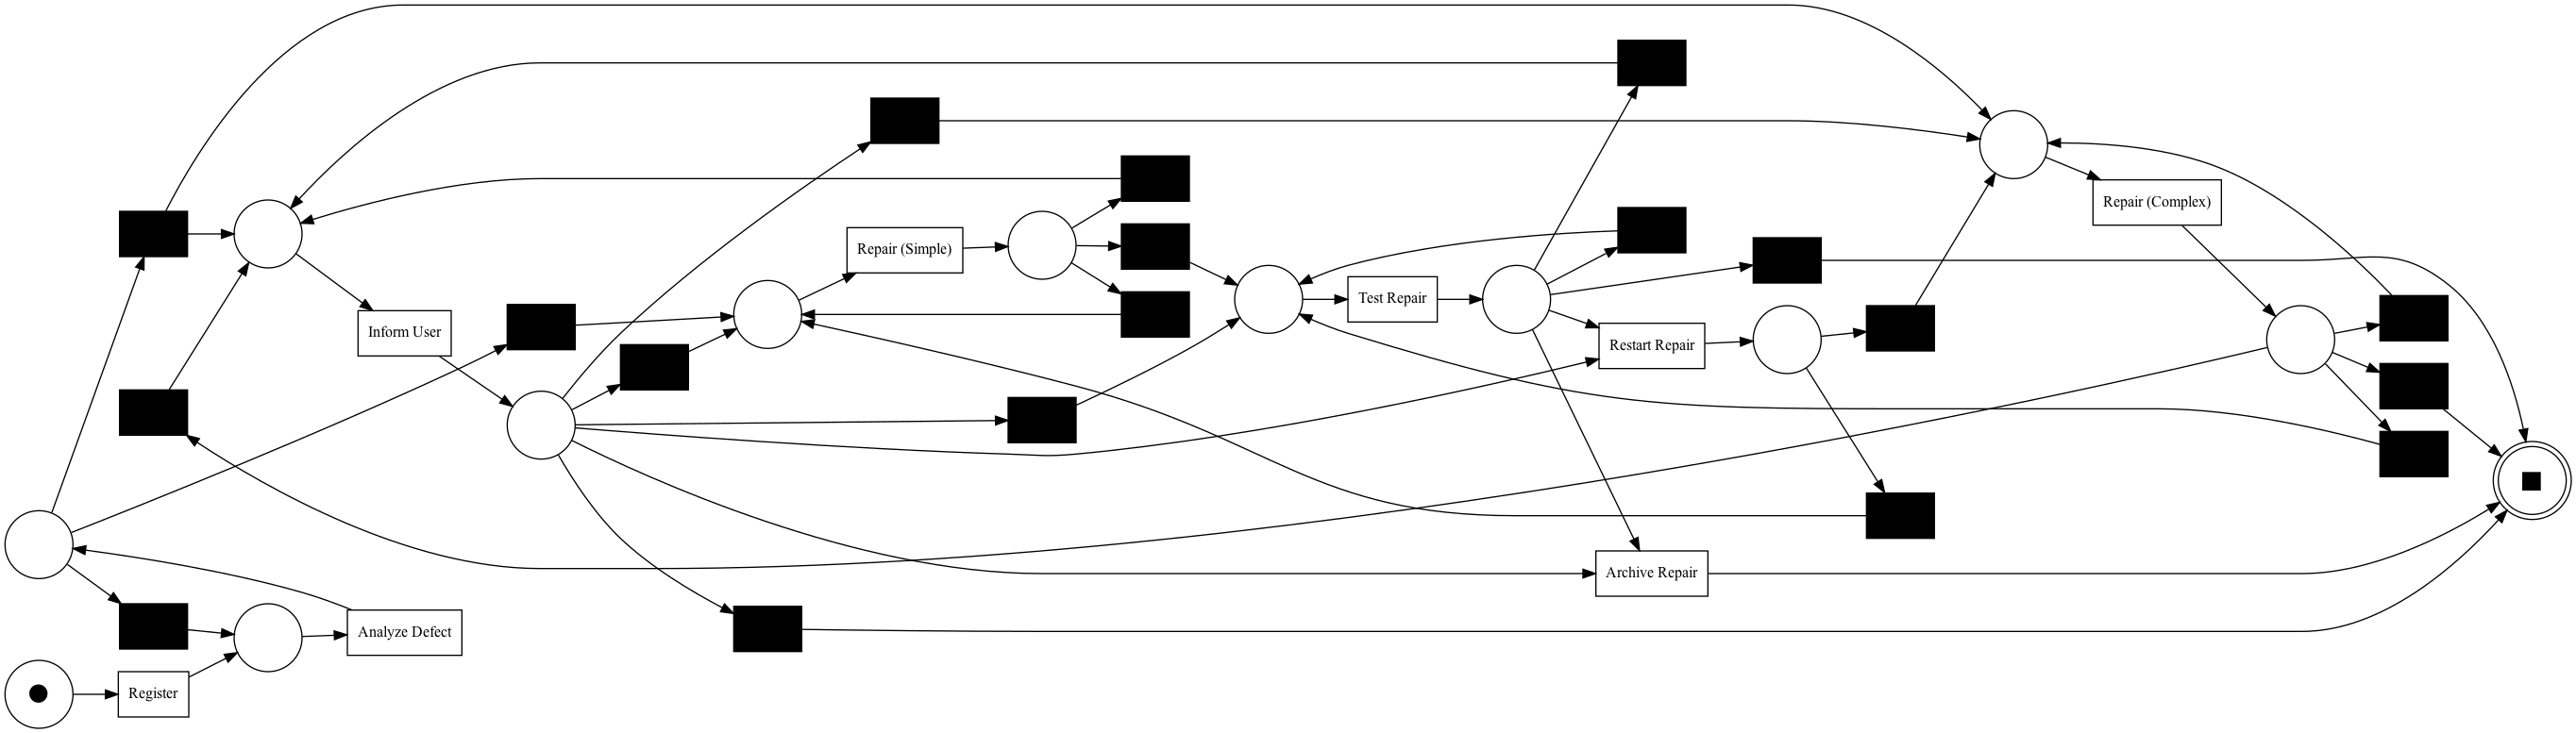

replaying log with TBR, completed variants :: 100%|██████████| 172/172 [00:00<00:00, 893.24it/s]

Fitness of Petrinet is:  95.80183615729139 %
Precision of Petrinet is:  51.45381984036488 %
Simplicity of Petrinet is:  54.05405405405405 %


In [182]:

net, im, fm = heuristics_miner.apply(som_sub_log1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log2

## Log Fitness and Precision of SubLog2

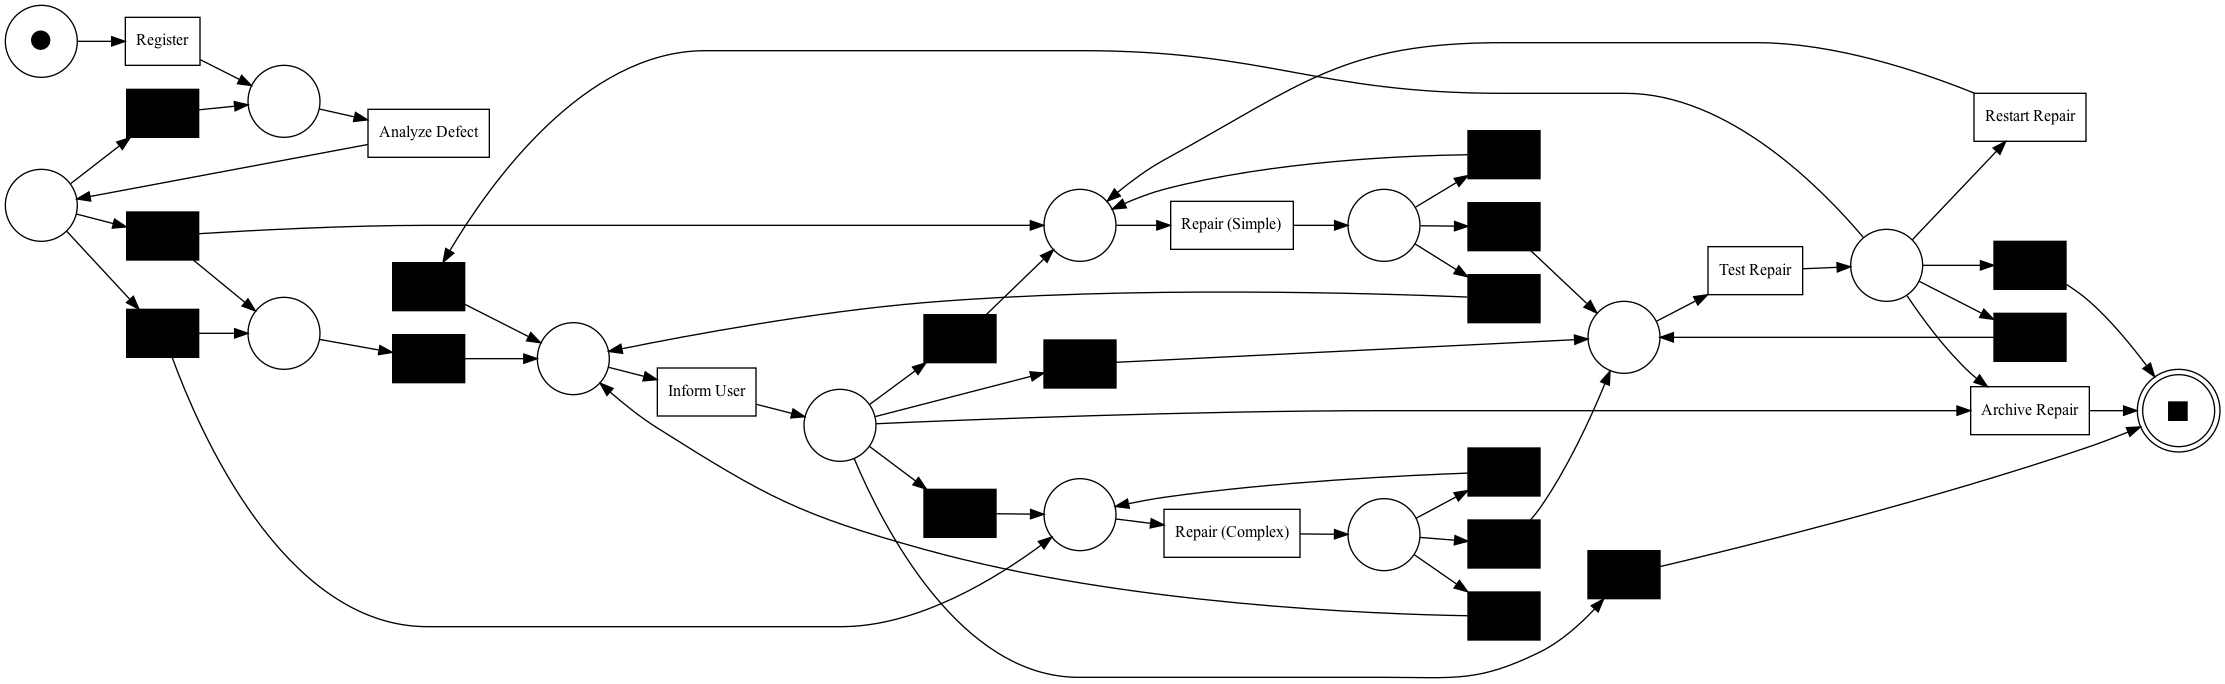

replaying log with TBR, completed variants :: 100%|██████████| 85/85 [00:00<00:00, 730.96it/s]

Fitness of Petrinet is:  94.84412925349129 %
Precision of Petrinet is:  45.740123750594954 %
Simplicity of Petrinet is:  55.88235294117647 %


In [183]:

net, im, fm = heuristics_miner.apply(som_sub_log2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log3

## Log Fitness and Precision of Sub Event log 3

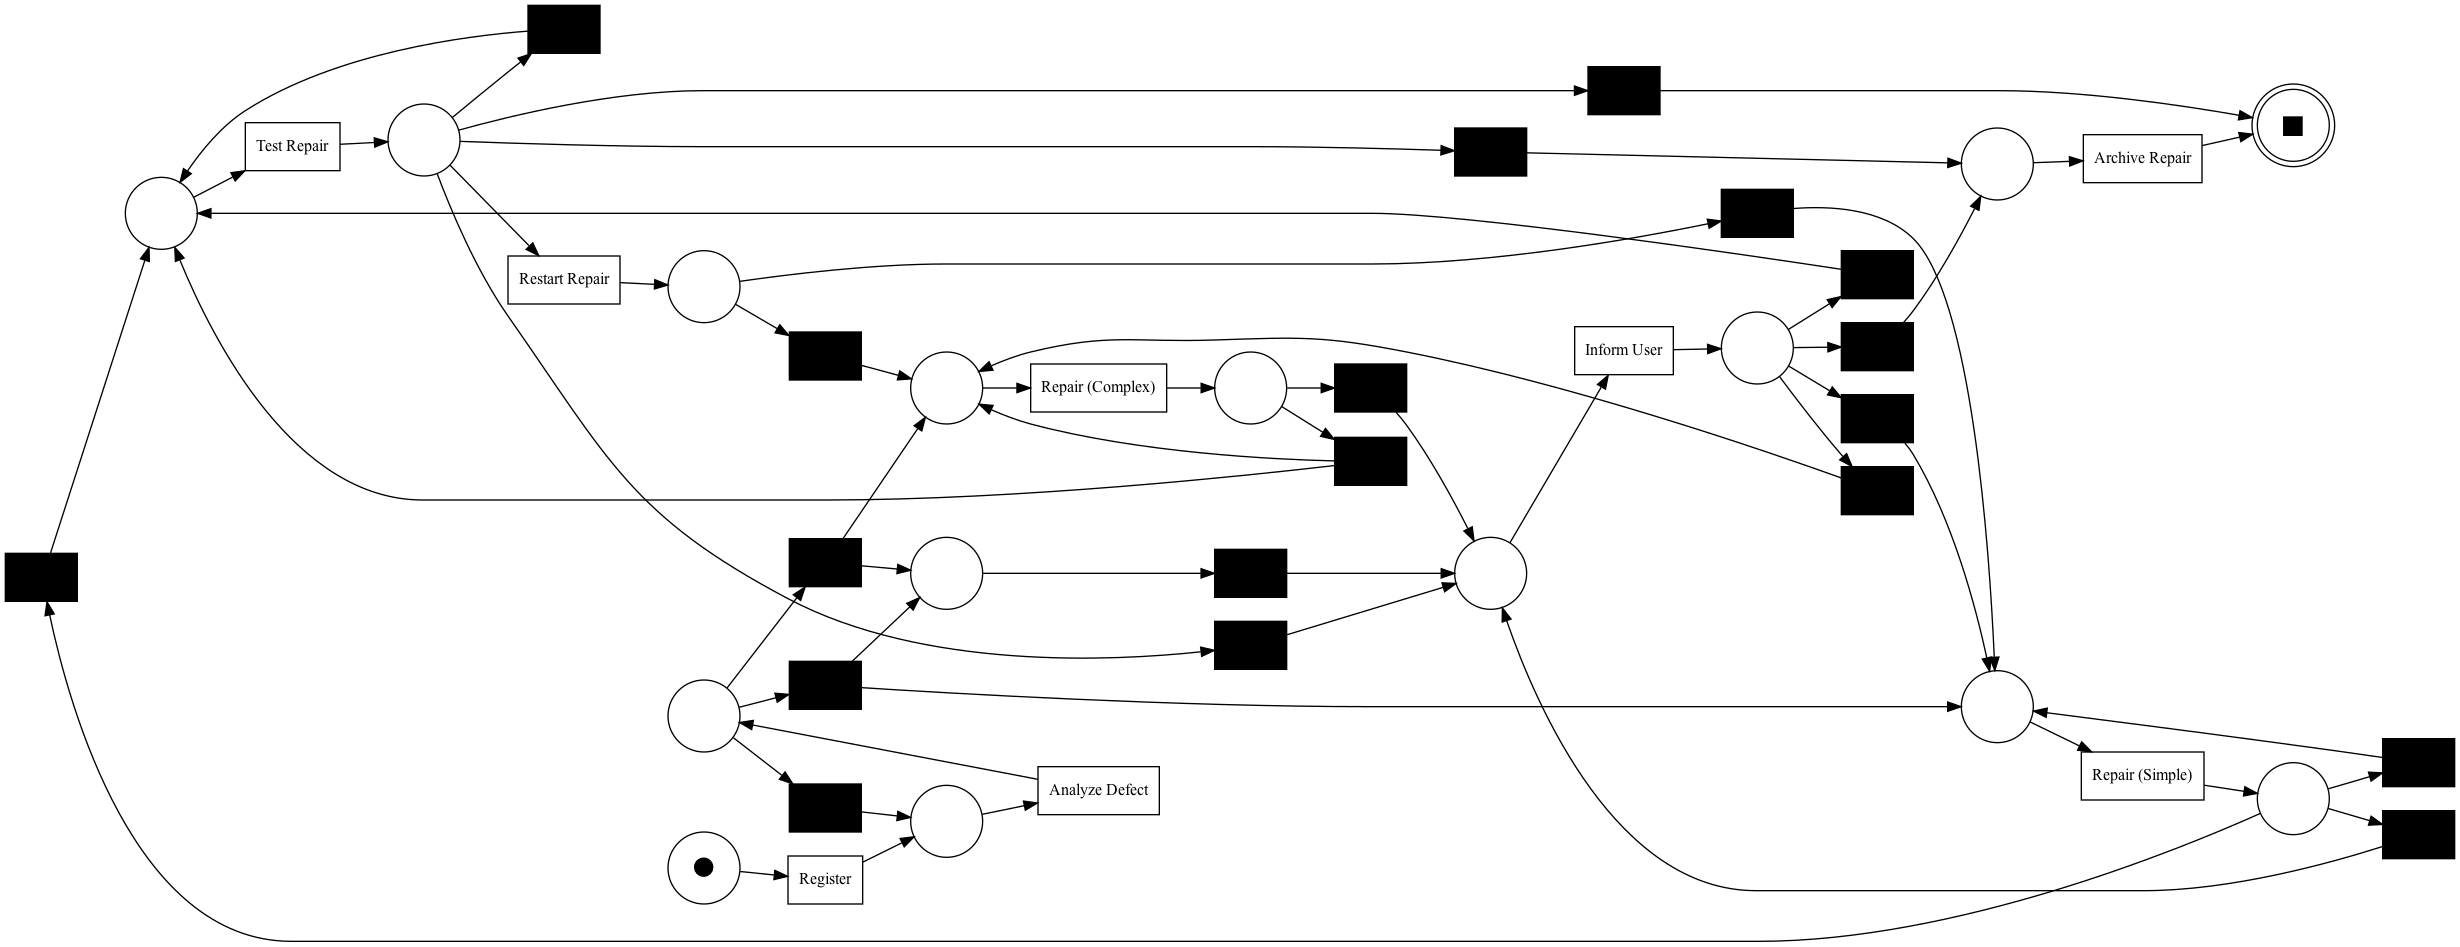

replaying log with TBR, completed variants :: 100%|██████████| 116/116 [00:00<00:00, 565.56it/s]

Fitness of Petrinet is:  95.16076947917146 %
Precision of Petrinet is:  41.124957898282254 %
Simplicity of Petrinet is:  58.33333333333333 %


In [184]:

net, im, fm = heuristics_miner.apply(som_sub_log3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log 4

## Log Fitness and Precision of SubLog 4

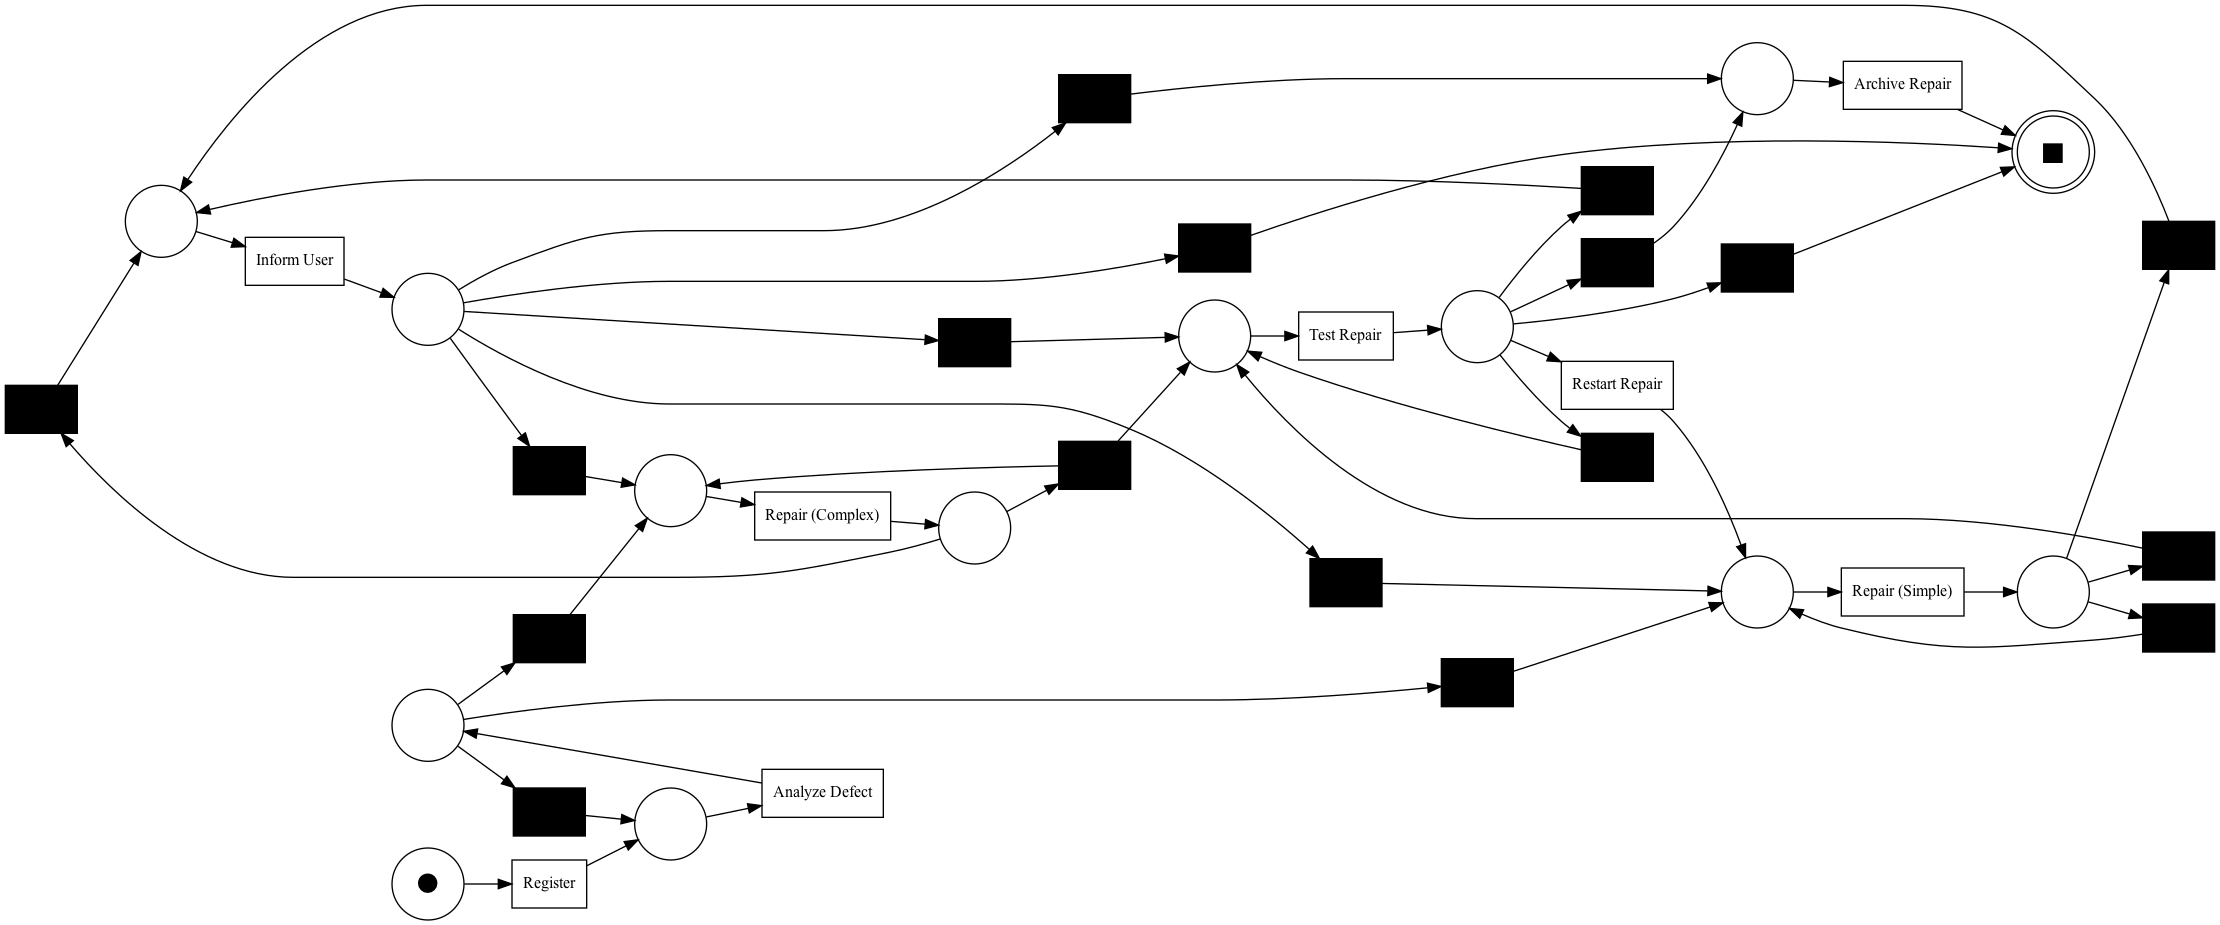

replaying log with TBR, completed variants :: 100%|██████████| 117/117 [00:00<00:00, 507.98it/s]

Fitness of Petrinet is:  96.65979704259492 %
Precision of Petrinet is:  44.755536982866694 %
Simplicity of Petrinet is:  59.375 %


In [185]:

net, im, fm = heuristics_miner.apply(som_sub_log4, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log4, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log4, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log 5

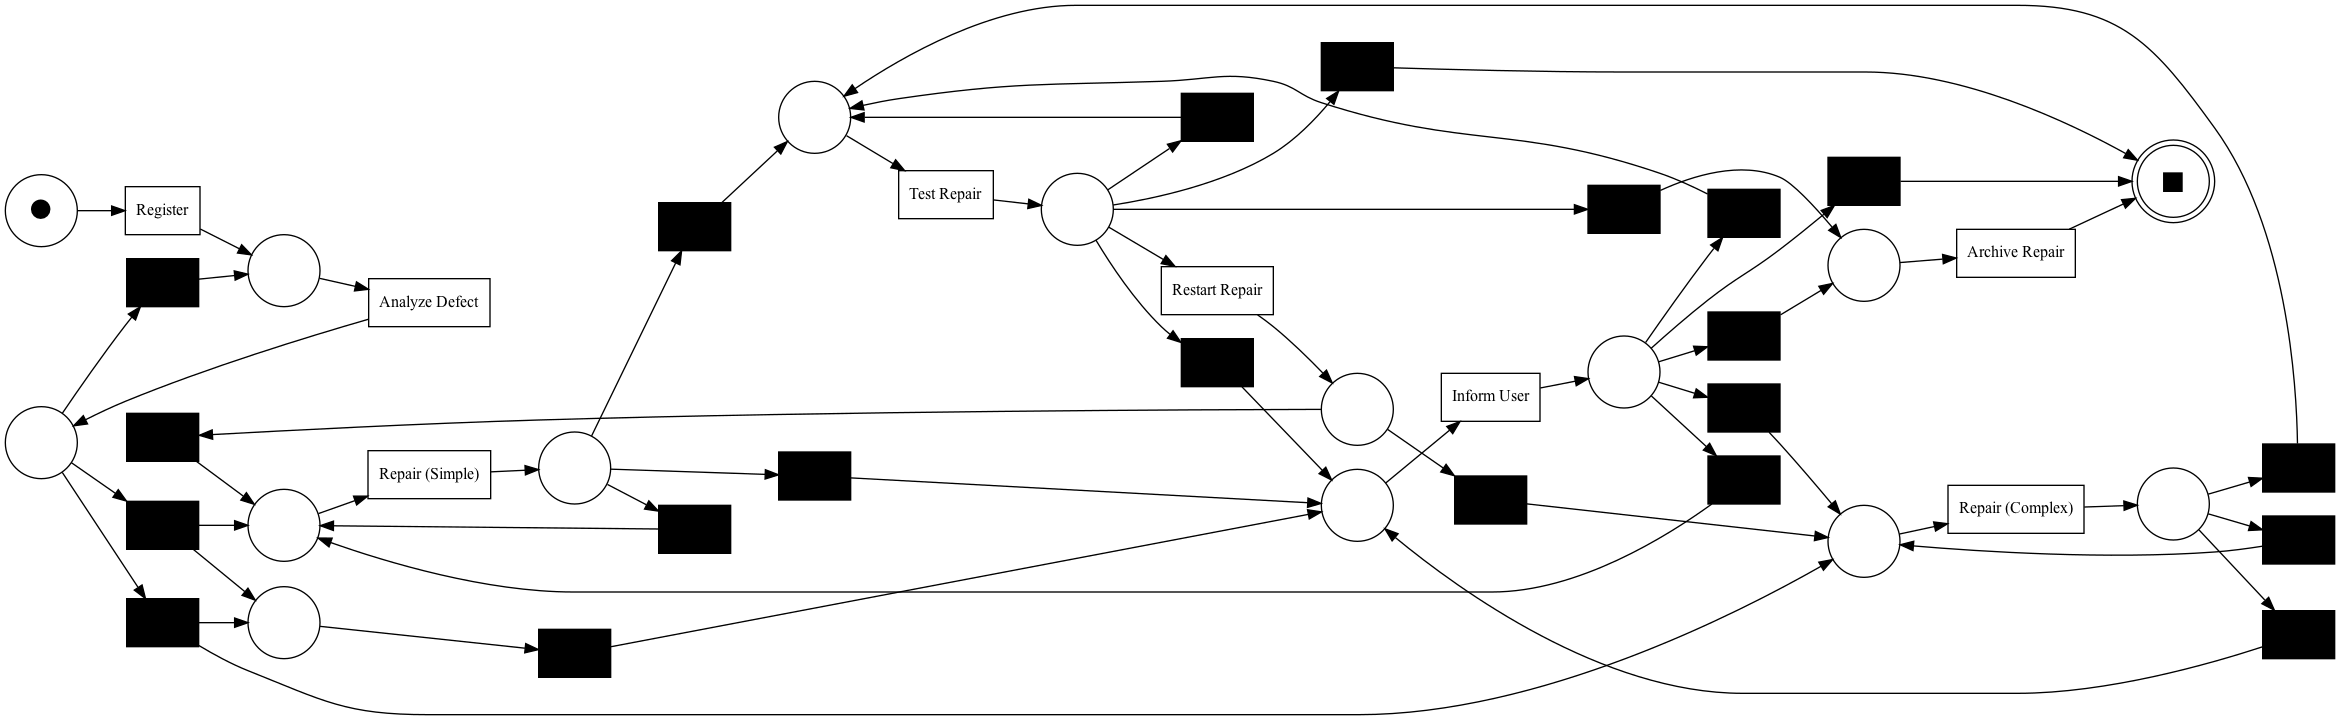

replaying log with TBR, completed variants :: 100%|██████████| 107/107 [00:00<00:00, 617.36it/s]

Fitness of Petrinet is:  97.45767241800898 %
Precision of Petrinet is:  42.99191374663073 %
Simplicity of Petrinet is:  57.89473684210527 %


In [186]:

net, im, fm = heuristics_miner.apply(som_sub_log5, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log5, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log5, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Log Fitness and Precision of SubLog 6

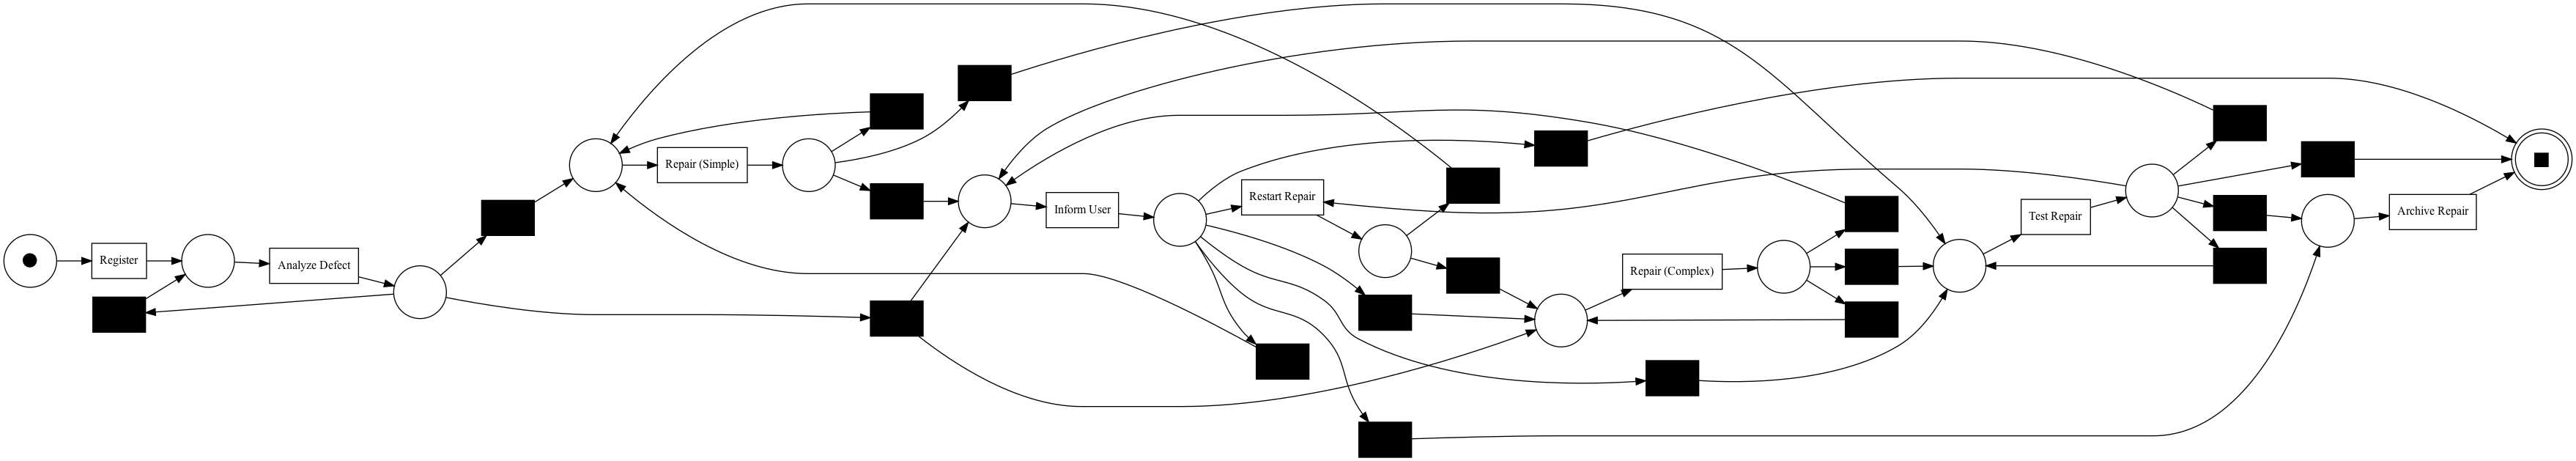

replaying log with TBR, completed variants :: 100%|██████████| 152/152 [00:00<00:00, 786.68it/s]

Fitness of Petrinet is:  97.66832249385395 %
Precision of Petrinet is:  47.38120950323974 %
Simplicity of Petrinet is:  56.75675675675676 %


In [187]:

net, im, fm = heuristics_miner.apply(som_sub_log6, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log6, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log6, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log 7

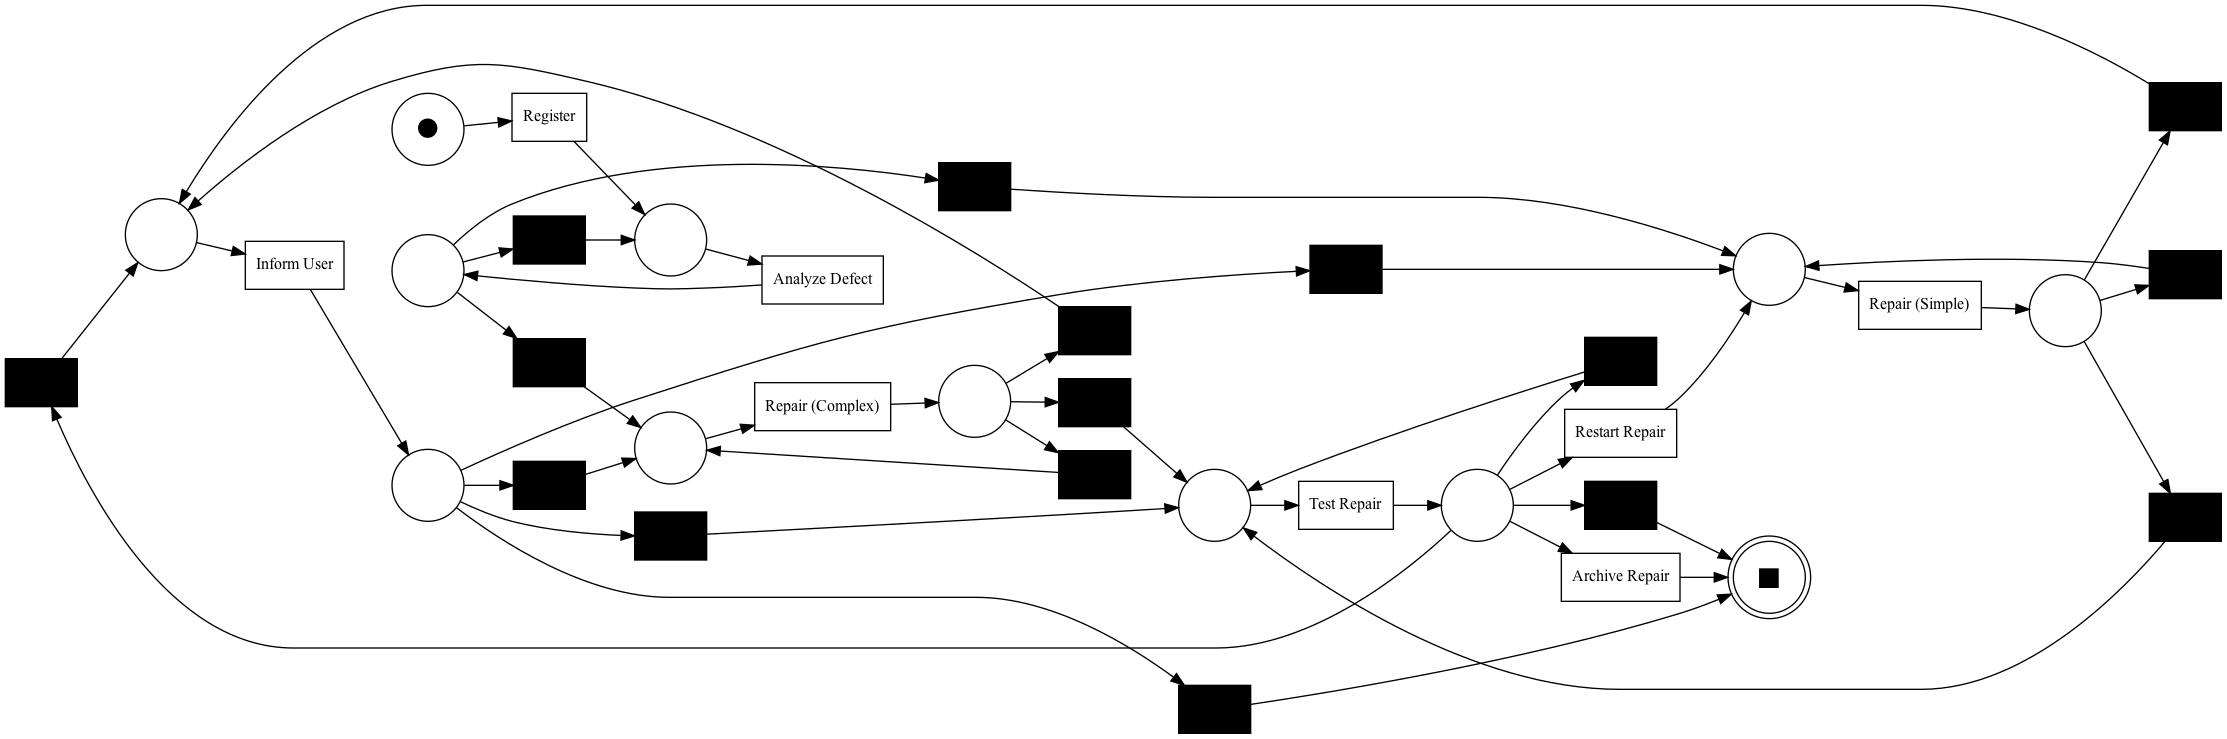

replaying log with TBR, completed variants :: 100%|██████████| 93/93 [00:00<00:00, 1015.73it/s]

Fitness of Petrinet is:  97.63617677286743 %
Precision of Petrinet is:  48.62385321100917 %
Simplicity of Petrinet is:  60.00000000000001 %


In [188]:

net, im, fm = heuristics_miner.apply(som_sub_log7, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log7, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log7, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log 8

## Log Fitness and Precision of Sub Event log 8

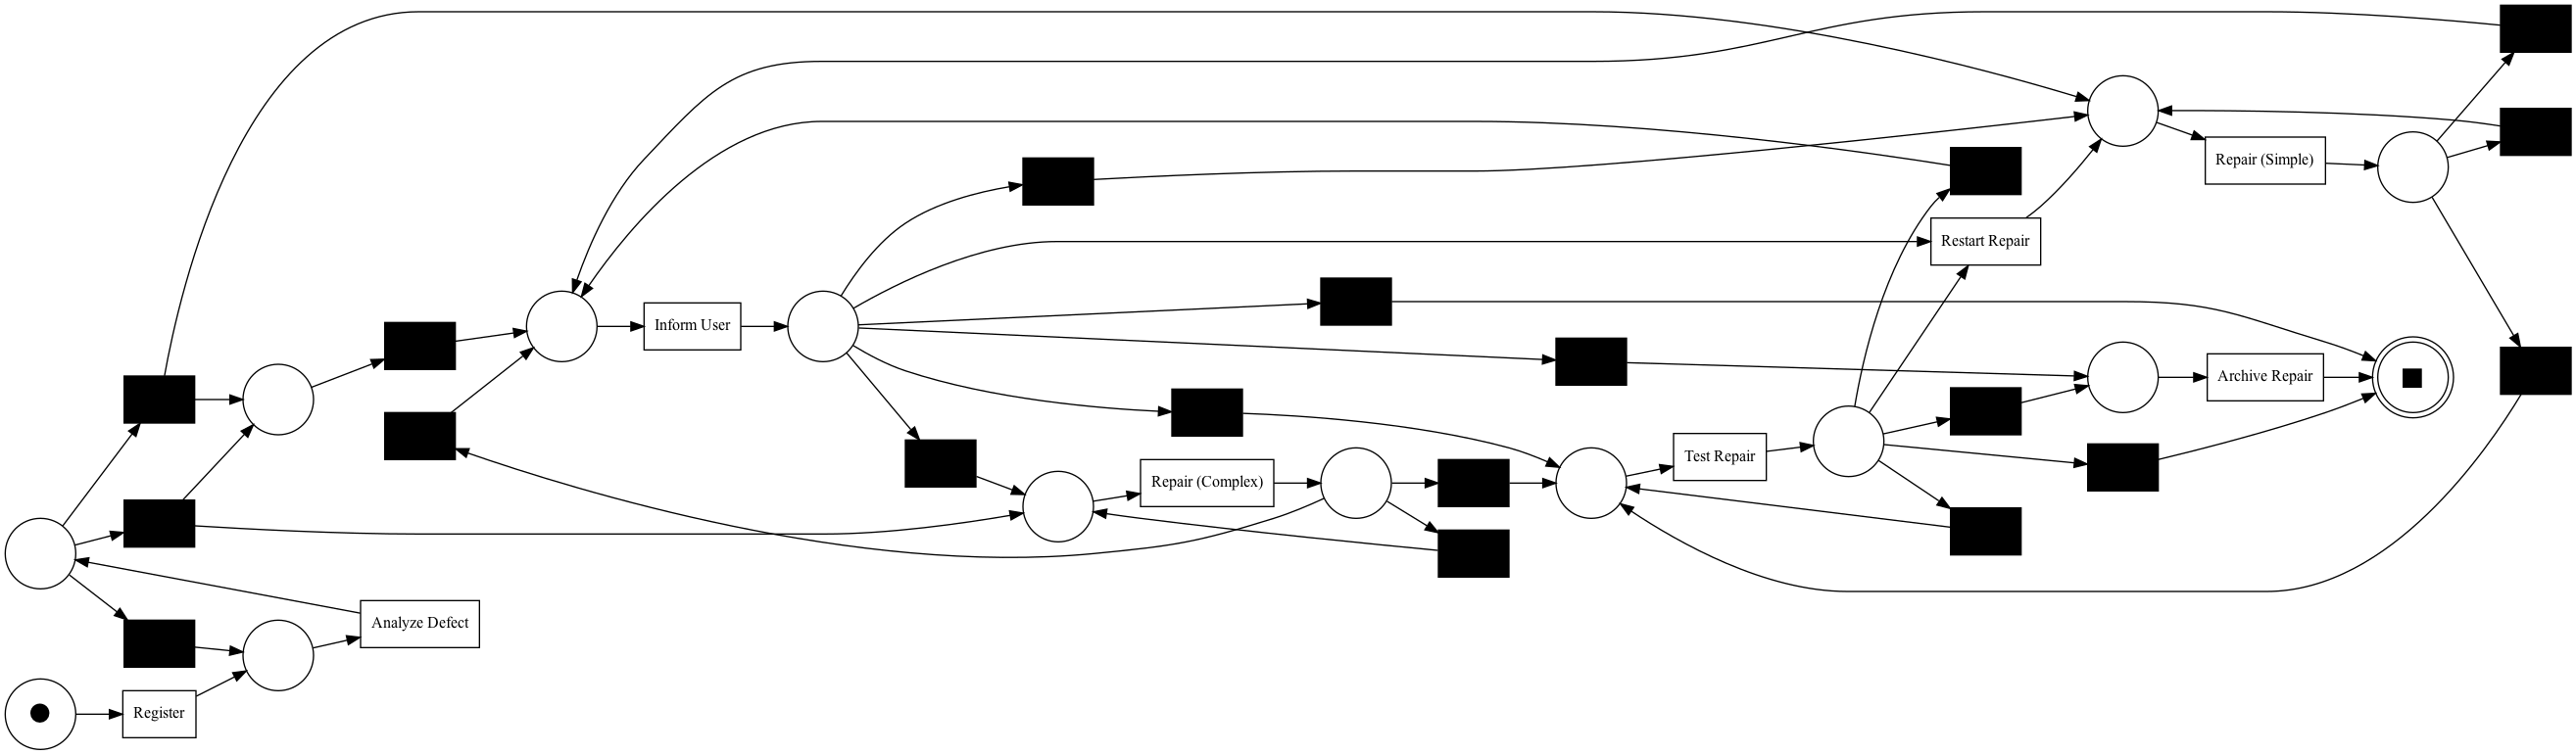

replaying log with TBR, completed variants :: 100%|██████████| 119/119 [00:00<00:00, 731.77it/s]

Fitness of Petrinet is:  96.42288692611561 %
Precision of Petrinet is:  45.97034171502257 %
Simplicity of Petrinet is:  56.16438356164384 %


In [189]:

net, im, fm = heuristics_miner.apply(som_sub_log8, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log8, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log8, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log 9

## Log Fitness and Precision of SubLog 9

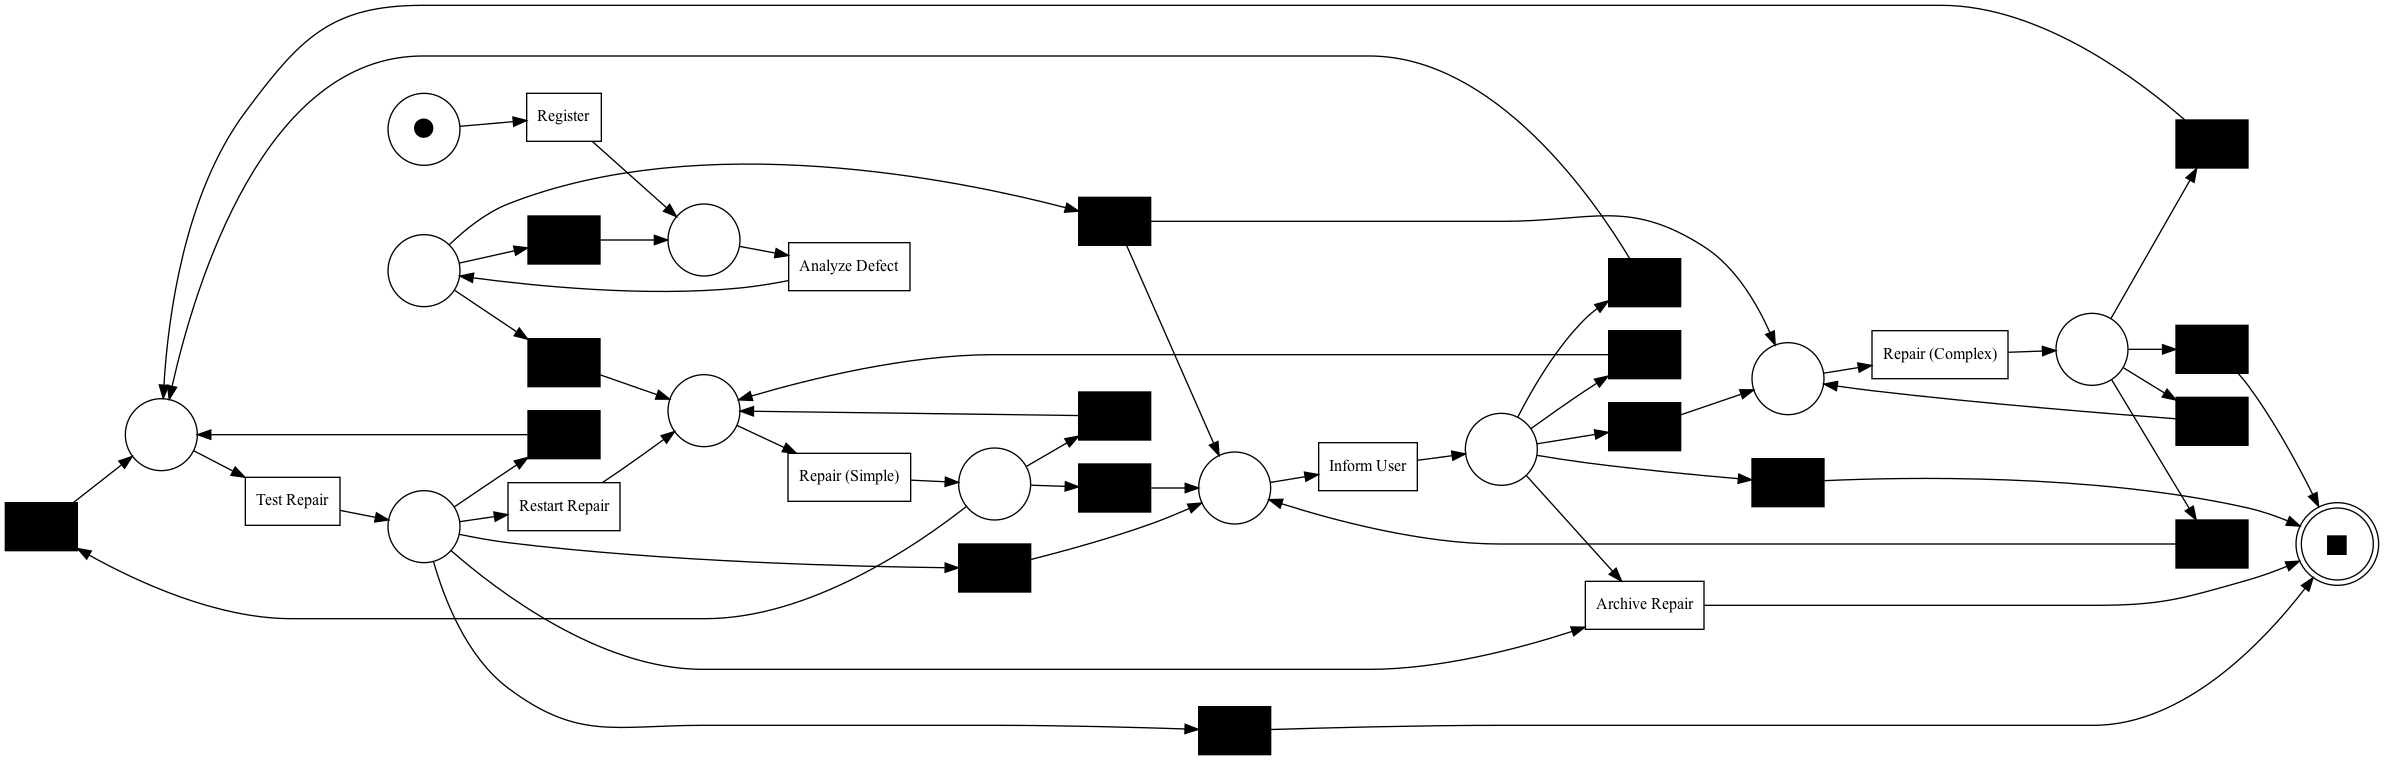

replaying log with TBR, completed variants :: 100%|██████████| 122/122 [00:00<00:00, 737.41it/s]

Fitness of Petrinet is:  96.16758318763598 %
Precision of Petrinet is:  47.895852255525284 %
Simplicity of Petrinet is:  55.22388059701492 %


In [190]:

net, im, fm = heuristics_miner.apply(som_sub_log9, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log9, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log9, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log 10

## Log Fitness and Precision of SubLog 10

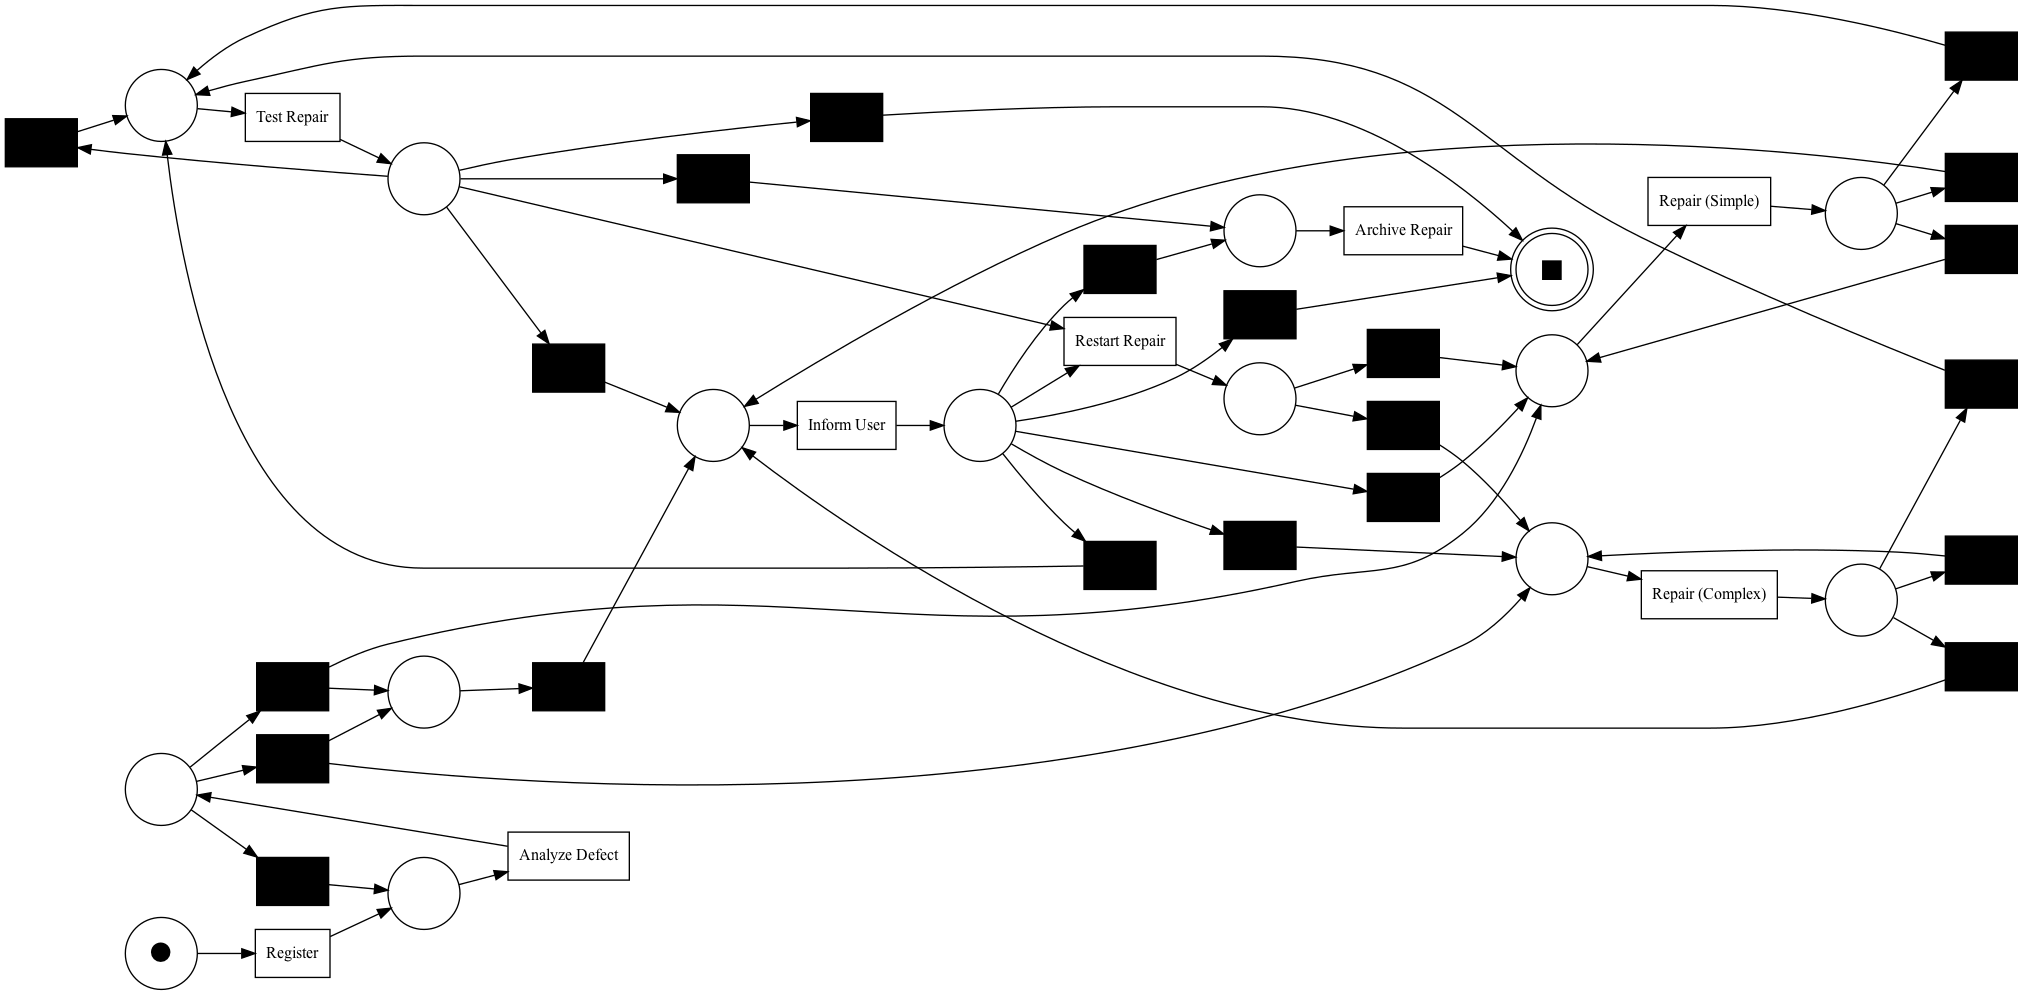

replaying log with TBR, completed variants :: 100%|██████████| 161/161 [00:00<00:00, 690.77it/s]

Fitness of Petrinet is:  96.74581769668583 %
Precision of Petrinet is:  47.29072031148605 %
Simplicity of Petrinet is:  56.4102564102564 %


In [191]:

net, im, fm = heuristics_miner.apply(som_sub_log10, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.90})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log10, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log10, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')